# ALTSCHOOL CAPSTONE PROJECT 

### Project By: BY EJIMBE PEACE AKACHUKWU
### email: peacefulpeace0695@gmail.com
                    

### TITLE : PREDICTION OF HOUSE SALES PRICE

### Project Question Overview 

In this capstone project, you will apply your data science and machine learning skills to develop a predictive model for house prices. This project will involve data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation. You will use a real-world dataset to build a model that can accurately predict house prices based on various features.


### DATASET: 

I will be using the dataset - Housing Sales: Factors Influencing Sale Prices(https://www.kaggle.com/code/rohit265/prediction-of-housing-sale-prices/input)

### Project Objective:  Predicting House Prices Using Machine Learning

The primary objective of this project is to develop a robust machine learning model capable of accurately predicting house prices based on a variety of house-related features. By leveraging historical data, the model will learn the underlying patterns and relationships between these features—such as lot size, building type, overall condition, square footage, and other relevant attributes—and the sale price of homes.

In this project and report, we explore the application of various data analysis techniques and machine learning models to predict house prices. By leveraging a housing dataset, we aim to uncover the key determinants of house prices and develop a predictive model that provides accurate and actionable insights for stakeholders in the housing market.

### Background of the Housing Market and the Significance of Predicting House Prices

The housing market plays a critical role in the global economy, influencing everything from individual wealth to national economic stability. For many individuals, purchasing a home is the most significant financial investment they will make in their lifetime. Consequently, understanding the factors that influence house prices is essential for buyers, sellers, investors, and policymakers alike.

In recent years, housing markets have experienced significant fluctuations due to various factors, including economic conditions, interest rates, and demographic shifts. These fluctuations can have far-reaching impacts. For instance, rising house prices can lead to increased household wealth and consumer spending, while a downturn can result in reduced spending and even broader economic challenges.

Predicting house prices is vital for multiple stakeholders:

- Homebuyers and Sellers: Accurate price predictions enable buyers to make informed purchasing decisions and help sellers set competitive prices.
- Real Estate Investors: Investors rely on price forecasts to identify profitable opportunities and manage risks.
- Lenders and Financial Institutions: Mortgage lenders use house price predictions to assess risk and determine loan-to-value ratios.
- Government and Policymakers: Accurate predictions help in crafting policies that stabilize the housing market and ensure affordability.

Given the complexity of the housing market, predicting house prices is challenging. Numerous factors influence prices, including the physical attributes of the property (e.g., size, location, age), economic indicators (e.g., interest rates, inflation), and external factors (e.g., neighborhood amenities, school quality). Machine learning models have increasingly become a valuable tool for predicting house prices, as they can analyze large datasets and identify patterns that may not be immediately apparent through traditional analysis.

### PROJECT HYPOTHESIS: The type of house, size of the house, age of the house, location are key components that determine and affect the price of a house.

At the end of the project after all analysis, we will be able certainly assertain how true this hypothesis is.

### Project Phases: The project is broken down in five(5) phases:

Phase 1: Data Collection and Preparation

Phase 2: Exploratory Data Analysis (EDA)

Phase 3: Feature Engineering

Phase 4: Model Training and Evaluation

Phase 5: Model Interpretation and Reporting

### __IMPORT NECESSARY LIBRARIES__

In [1]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Importing libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Importing libraries for machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Importing libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### __IMPORT DATASET__

In [2]:
# Import the data
housing_df = pd.read_csv(r"C:\Users\peace\OneDrive\Desktop\Third semester project\housing.csv")

In [3]:
# View the first five rows in the dataset to confirm what I imported
housing_df.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

In [4]:
# Checking the size of the dataset
housing_df.shape

(2413, 18)

### __GENERAL OVERVIEW OF THE DATASET__

In [5]:
# Have a peek at the dataset by displaying the first five rows
housing_df.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

#### **How many features and observations do we have in our dataset?**

- The features are te columns while the observations are the rows.
- Printing the shape of a dataframe returns a tuple which with the number of rows first and then the number of columns.

In [6]:
# Check the size of the dataset
data_size = housing_df.shape

print(f'The housing data has {data_size[0]} rows (observations) and {data_size[-1]} columns (features)')

The housing data has 2413 rows (observations) and 18 columns (features)


### Summary:

- Number of rows: 2413
- Number of columns: 18
- Target variable: SalePrice

#### **What are the different features contained in our dataset?**

In [7]:
# print the columns in our dataset 
columns = list(housing_df.columns)
print(columns)

['Lot_Frontage', 'Lot_Area', 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Year_Built', 'Exter_Cond', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


### A description of all the features contained in our dataset:

__Understanding the meaning of the feature or column names in the dataset will help us understand what the data is all about, do more research to get a domain knowledge and how to approach the data for analysis__

__Features and their description__

Lot_Frontage: Linear feet of street connected to the property.

Lot_Area: Lot size in square feet.

Bldg_Type: Type of building (e.g., single-family, multi-family).

House_Style: Style of the house (e.g., ranch, two-story).

Overall_Cond: Overall condition rating of the house.

Year_Built: Year the house was built.

Exter_Cond: Exterior condition rating of the house.

Total_Bsmt_SF: Total square feet of basement area.

First_Flr_SF: First-floor square feet.

Second_Flr_SF: Second-floor square feet.

Full_Bath: Number of full bathrooms.

Half_Bath: Number of half bathrooms.

Bedroom_AbvGr: Number of bedrooms above ground(basement level).

Kitchen_AbvGr: Number of kitchens above ground(basement level).

Fireplaces: Number of fireplaces.

Longitude: Longitude coordinates of the property location.

Latitude: Latitude coordinates of the property location.

Sale_Price: Sale price of the property.

### Statistical summary of our data

Here I will look at the:

- general info of the data which tells the features, the type of data contained in each column, the number of non null count and some other general information about the data.

- The description of the numeric features which gives a general statistics of all the numeric features such as the mean, median, mode, percentile, std etc.

- The description of the categorical features showing their counts, mode(most frequent), number of unique values.

In [8]:
# Check the general overview of our data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

#### INSIGHT:

From the info result we see:
- That the non-nonull count for each feature which is 2413 corresponds to the number of observation or rows in our dataset and what we can easily deduce from this information is that there is no missing or null values for any of the features in our data.

- We have 2 features having float64 data type, 12 features or column having int64 datatype and 4 features or columns having object data type.

In [9]:
# Check the statistical summary of our data- numerical
housing_df.describe(include=[np.number]).T

count           mean           std           min  \
Lot_Frontage   2413.0      55.462495     33.542416      0.000000   
Lot_Area       2413.0   10060.208040   8222.759854   1300.000000   
Year_Built     2413.0    1969.436386     29.487943   1872.000000   
Total_Bsmt_SF  2413.0    1022.827600    408.977848      0.000000   
First_Flr_SF   2413.0    1133.857024    366.442470    334.000000   
Second_Flr_SF  2413.0     339.242851    423.198488      0.000000   
Full_Bath      2413.0       1.539163      0.544667      0.000000   
Half_Bath      2413.0       0.377953      0.498467      0.000000   
Bedroom_AbvGr  2413.0       2.854538      0.813430      0.000000   
Kitchen_AbvGr  2413.0       1.040199      0.200642      0.000000   
Fireplaces     2413.0       0.602984      0.648911      0.000000   
Longitude      2413.0     -93.642391      0.026159    -93.693153   
Latitude       2413.0      42.033730      0.018015     41.986498   
Sale_Price     2413.0  175567.643183  70979.614441  35000.000000   

                         25%            50%            75%            max  
Lot_Frontage       37.000000      60.000000      77.000000     313.000000  
Lot_Area         7390.000000    9360.000000   11404.000000  215245.000000  
Year_Built       1953.000000    1971.000000    1998.000000    2010.000000  
Total_Bsmt_SF     784.000000     970.000000    1246.000000    3206.000000  
First_Flr_SF      866.000000    1060.000000    1350.000000    3820.000000  
Second_Flr_SF       0.000000       0.000000     704.000000    1872.000000  
Full_Bath           1.000000       2.000000       2.000000       4.000000  
Half_Bath           0.000000       0.000000       1.000000       2.000000  
Bedroom_AbvGr       2.000000       3.000000       3.000000       6.000000  
Kitchen_AbvGr       1.000000       1.000000       1.000000       3.000000  
Fireplaces          0.000000       1.000000       1.000000       4.000000  
Longitude         -93.661562     -93.640326     -93.621485     -93.577427  
Latitude           42.021547      42.034569      42.047997      42.063381  
Sale_Price     129500.000000  159000.000000  206900.000000  755000.000000

### Summary of Descriptive Statistics for Numerial Features:

- Lot_Frontage: The average lot frontage is approximately 55 feet, with values ranging from 0 to 313 feet. There is moderate variation in lot frontage square feet, as indicated by a standard deviation of 33.82 feet.

- Lot_Area: The mean lot area is about 10,060 square feet, with a wide range from 1,300 to 215,245 square feet. The high standard deviation of 8,520 square feet suggests significant variability in lot area square feet.

- Year_Built: The year of construction spans from 1872 to 2010. The data shows that most homes are fairly recent, with the 25th percentile at 1953 and the 75th percentile at 1998.

- Total_Bsmt_SF: The average basement area is 1,02.8 square feet,with a relatively high standard deviation of about 409 square feet. Basement sizes range from 0 to 3,206 square feet.

- First_Flr_SF: The average first-floor area is 1,133.9 square feet, with a broad range from 334 to 3,820 square feet. This shows significant differences in sizes of first-floor .

- Second_Flr_SF: The mean second-floor area is 339.2 square feet, but many homes have no second floor, resulting in a large standard deviation of 423.2 square feet. Most homes either have no second floor or a small one.

- Full_Bath: On average, homes have about 1.54 full bathrooms, with values ranging from 0 to 4. The standard deviation of about 0.54 reflects little variability in the number of bathrooms.

- Half_Bath: The average number of half bathrooms is 0.38, with most homes having none or one. The low standard deviation (0.5) indicates that the number of half bathrooms is fairly consistent.

- Bedroom_AbvGr: Homes typically have about 2.85 bedrooms above ground, ranging from 0 to 6. The data shows a low spread with a standard deviation of 0.81.

- Kitchen_AbvGr: On average, homes have just over one kitchen above ground. Most homes have none, with a low standard deviation (0.20).

- Fireplaces: Homes generally have about 0.6 fireplaces, with a range from 0 to 4. The standard deviation of 0.65 reflects a wide variation in the number of fireplaces.

- Longitude and Latitude: The longitude varies slightly around -93.64, and the latitude around 42.03, with very narrow ranges and low standard deviations, indicating the dataset is geographically concentrated.

- Sale_Price: The average sale price is \$175567.64, with significant variation (standard deviation of \$70979.61) and a range from \$35,000 to \$755,000. This suggests a wide disparity in property values.

In [10]:
# Check the statistical summary of our data- Categorical
housing_df.describe(include= "object").T

count unique        top  freq
Bldg_Type     2413      5     OneFam  2002
House_Style   2413      8  One_Story  1189
Overall_Cond  2413      9    Average  1282
Exter_Cond    2413      5    Typical  2081

### Summary of Descriptive Statistics for Categorical Features:

- The Building Type has 5 unique values with OneFam being the most frequent with a count of 2002.
- The House Style has 8 unique values with One_Story being the most frequent with a count of 1189.
- The Overall Condition has 9 unique values with Average being the most frequent with a count of 1282.
- The Exterior Condition has 5 unique values with Typical being the most frequent with a count of 2081

### **DATA CLEANING**

__Cleaning data is crucial in analysis because it removes inaccuracies, inconsistencies, and irrelevant information, ensuring the dataset is reliable and accurate. It prevents errors in model training, enhances the quality of insights, and allows for more accurate predictions. By eliminating noise and correcting issues, clean data leads to more valid and actionable results.__

To clean the data I will be doing the folowing:

- Identify and handle missing data.

- Identify and remove duplicate records.

- Correct typographical errors and inconsistencies

- Ensure consistent formats (dates, time, units, labels)

- Convert data types to appropriate formats

- Handling Categorical Variables: Clean text (remove special characters, punctuation, stop words)

## Identify and handle missing data.

__Are there any missing data in our dataset?__

In [11]:
# Identify and handle missing data.
housing_df.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

Isna().sum() is the code calculating the total missing values in each column and from the above result, we can see that there are no more missig values in the dataset.

# Handle duplicate records

__Are there duplicate records in our dataset?__

In [12]:
housing_df.duplicated().sum()

0

Using duplicated().sum() we can see that there is no duplicate observation in our dataset meaning no observation was recorded more than once.

#### **Correcting typographical errors and inconsistencies**

__Does our data contain typographical errors and inconsistencies?__

In [13]:
# View the first 5 rows of our data
housing_df.head()

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

In [14]:
# Extract categorical features as a list
categorical_features = housing_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Extract numerical features as a list
numerical_features = housing_df.select_dtypes(include=['number']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']
Numerical features: ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude', 'Sale_Price']


__For the categorical features which are 4 in number, I will be inspecting them one after the other to ensure that there are no typographical errors and inconsistencies.__

In [15]:
# Subset the object type features for inspection
cate_df = housing_df[categorical_features]
cate_df.head()

Bldg_Type House_Style   Overall_Cond Exter_Cond
0    OneFam   One_Story        Average    Typical
1    OneFam   One_Story  Above_Average    Typical
2    OneFam   One_Story  Above_Average    Typical
3    OneFam   One_Story        Average    Typical
4    OneFam   Two_Story        Average    Typical

In [16]:
# View the unique entries in each feature
for feature in cate_df.columns:
    unique_entries = cate_df[feature].unique()
    print(f'The unique entries in {feature} are {unique_entries}')

The unique entries in Bldg_Type are ['OneFam' 'TwnhsE' 'Twnhs' 'Duplex' 'TwoFmCon']
The unique entries in House_Style are ['One_Story' 'Two_Story' 'One_and_Half_Fin' 'SLvl' 'SFoyer'
 'Two_and_Half_Unf' 'One_and_Half_Unf' 'Two_and_Half_Fin']
The unique entries in Overall_Cond are ['Average' 'Above_Average' 'Good' 'Very_Good' 'Poor' 'Below_Average'
 'Excellent' 'Fair' 'Very_Poor']
The unique entries in Exter_Cond are ['Typical' 'Good' 'Fair' 'Poor' 'Excellent']


__Description of some uncommon categorical features entries for better understanding:__
    
- OneFam:  single-family residence meaning a standalone house designed for one family.

- TwnhsE in a housing dataset typically refers to a "Townhouse End Unit," which is a type of residential building where the unit is located at the end of a row of townhouses, sharing only one common wall with a neighboring unit.

- Twnhs: Refers to a "Townhouse Inside Unit," which is a residential unit within a row of townhouses, sharing walls with adjacent units on both sides.

- TwoFmCon: Refers to a "Two-Family Conversion," which is a house originally designed for one family but later converted into a two-family dwelling.

- One_and_Half_Fin: Indicates a "One and a Half Story Finished," where the house has one full floor and a second level with partial or finished living space.

- SLvl: Stands for "Split Level," which is a style of house with staggered floor levels, typically with short flights of stairs connecting the different levels.

- SFoyer: Refers to a "Split Foyer," a type of house where the front door opens to a landing between the main level and a lower level, with stairs leading to each.

- Two_and_Half_Unf: Describes a "Two and a Half Story Unfinished," where the house has two full stories and a third partial story that is unfinished.

- One_and_Half_Unf: Indicates a "One and a Half Story Unfinished," with one full story and a second level with partial living space that is unfinished.

- Two_and_Half_Fin: Refers to a "Two and a Half Story Finished," where the house has two full stories and a third partial story that is fully finished.

In [17]:
# Subset the numerical type features for inspection
# create numerical columns
num_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns

# create a dataframe for only numerical columns
num_df = housing_df[num_cols]
num_df.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0           141     31770        1960           1080          1656   
1            80     11622        1961            882           896   
2            81     14267        1958           1329          1329   
3            93     11160        1968           2110          2110   
4            74     13830        1997            928           928   

   Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0              0          1          0              3              1   
1              0          1          0              2              1   
2              0          1          1              3              1   
3              0          2          1              3              1   
4            701          2          1              3              1   

   Fireplaces  Longitude   Latitude  Sale_Price  
0           2 -93.619754  42.054035      215000  
1           0 -93.619756  42.053014      105000  
2           0 -93.619387  42.052659      172000  
3           2 -93.617320  42.051245      244000  
4           1 -93.638933  42.060899      189900

In [18]:
# View the unique entries in each feature
for feature in num_df.columns:
    unique_entries = num_df[feature].unique()
    print(f'The unique entries in {feature} are {unique_entries}')
    print('\n')

The unique entries in Lot_Frontage are [141  80  81  93  74  78  41  43  39  60  75   0  63  85  47 152 140 105
  65  70  26  21  53  24  98  90  79 110  61  36 100  67 108  59  92  58
  56  73  72  84  76  50  55  68  88 107  25  30  40  77 120 137  87 119
  64  96  71  69  52  51  57  54  86  94 124  83  82  38  44  48  66  45
  35 129  89  31  42  28  99  95  97 102 103  34 117 149 122  62 174 106
 112  32 128  91 121 144 130 109 150 113 125 101  46 104 135 136  37  22
 313  49 115 123 195  33 118 116 138 114 155 126 200 131 153 134]


The unique entries in Lot_Area are [31770 11622 14267 ...  7937  8885 10441]


The unique entries in Year_Built are [1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 1993 1990 1985 2003
 1988 1951 1978 1977 2000 1970 1971 1975 2007 2005 2004 2002 2006 1996
 1994 2009 2008 1980 1979 1984 1920 1965 1967 1963 1962 1976 1972 1966
 1959 1964 1950 1952 1949 1940 1954 1955 1957 1956 1948 1910 1927 1915
 1945 1929 1938 1928 1890 1885 1922 1925 1942 1936 1930

__From the results for the unique values in all the features, there are no errors or inconsistencies__

#### **Ensure consistent formats (dates, time, units, labels)**

In this section will be taking a look at the entries for each feature to ensure that they are entered in using the right metrics and units, especially date and time features, they mostly come as object or integer data types sometimes so there is usually a need to convert their data types and also ensure they are entered in the right format. For the units and lables, I will be using the data description file for inspection.

In [19]:
# Inspecting Year Built- the only feature that has to do with time
housing_df[['Year_Built']]

Year_Built
0           1960
1           1961
2           1958
3           1968
4           1997
5           1998
6           2001
7           1992
8           1995
9           1999
10          1993
11          1992
12          1998
13          1990
14          1985
15          2003
16          1988
17          1951
18          1978
19          1977
20          2000
21          1970
22          1971
23          1968
24          1970
25          1971
26          1999
27          1971
28          1971
29          1977
30          1975
31          1975
32          1978
33          2007
34          2005
35          2005
36          2004
37          2003
38          2002
39          2005
40          2006
41          2003
42          2005
43          2006
44          2004
45          2004
46          2002
47          2004
48          2000
49          2001
50          1999
51          1998
52          1996
53          1994
54          1999
55          1998
56          1995
57          2005
58          2009
59          2008
60          2004
61          2005
62          2004
63          2004
64          1994
65          1980
66          1992
67          1979
68          1984
69          1993
70          1984
71          1980
72          1920
73          1978
74          1961
75          1965
76          1967
77          1963
78          1962
79          1992
80          1993
81          1992
82          2004
83          2004
84          2004
85          2004
86          2004
87          2005
88          2000
89          2000
90          1999
91          2003
92          2000
93          1980
94          1978
95          1976
96          2002
97          1967
98          1993
99          1977
100         1978
101         1988
102         1972
103         1971
104         1966
105         1963
106         1959
107         1966
108         1967
109         1964
110         1950
111         1952
112         1949
113         1958
114         1940
115         1954
116         1955
117         1954
118         1966
119         1960
120         1970
121         1966
122         1958
123         2003
124         1959
125         1959
126         1957
127         1959
128         1960
129         1959
130         1959
131         1956
132         1952
133         1955
134         1920
135         1955
136         1954
137         1956
138         1980
139         1959
140         1967
141         1948
142         1959
143         1952
144         1951
145         1962
146         1960
147         1963
148         1966
149         1910
150         1920
151         1927
152         1957
153         1915
154         1945
155         1929
156         1938
157         1948
158         1920
159         1928
160         1915
161         1890
162         1957
163         1910
164         1885
165         1922
166         1950
167         1922
168         1925
169         1940
170         1942
171         1948
172         1936
173         1930
174         1923
175         1921
176         1915
177         1912
178         1920
179         1963
180         1930
181         1900
182         1940
183         1959
184         1917
185         1915
186         1940
187         1910
188         1875
189         1967
190         1968
191         1965
192         1957
193         1967
194         1968
195         1966
196         1969
197         1968
198         1978
199         1968
200         1996
201         1977
202         1927
203         1950
204         1979
205         1978
206         1938
207         1950
208         1956
209         1947
210         1954
211         2009
212         1964
213         1985
214         1987
215         1993
216         1993
217         1992
218         2008
219         2006
220         2009
221         2010
222         1990
223         1900
224         1971
225         1996
226         1997
227         1998
228         1977
229         1977
230         1976
231         1972
232         2003
233         2001
234        

As we can see from the above, the only date time feature (Year Built) is an integer type. Now I understand that it might not really be necessary to convert it depending on the kind of analysis that needs to be carried out and I won't be converting this feature to datetime because of the following:

1. The conversion is not going to be effective as pandas will only convert them to 1st of January of each and we don't have further details to ensure this does not happen

2. To determine the age of each of the houses if the need arises, I can easily use a loop to subtract each year from 2024 and then append them to the dataset

Lastly, the data description file was studied as well for each of our features and they are all consistent when it comes to labels, units of measurements and standards

### PHASE 2: EXPLORATORY DATA ANALYSIS(EDA)

Exploratory Data Analysis (EDA) is crucial because it helps in understanding the underlying structure and patterns in the data, identifying anomalies or outliers, and guiding the selection of appropriate modeling techniques. EDA allows you to summarize the main characteristics of the data through visualization and statistical analysis, facilitating better decision-making and ensuring that the subsequent modeling is based on a well-informed foundation.

### Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices).

The EDA will be carried out as follows to have a comprehensive overview of our dataset:

- Non-Graphical Univariate Analysis
- Graphical Univariate Analysis

#### Non-Graphical Univariate Analysis

#### Calculate the frequency for the categorical features

In [20]:
# Frequency distribution for categorical features
for feature in categorical_features:
    print(f"Frequency distribution for {feature}:\n{housing_df[feature].value_counts()}\n")
    print(f"Proportions for {feature}:\n{housing_df[feature].value_counts(normalize=True)}\n")
    print(f"Unique values for {feature}: {housing_df[feature].unique()}\n")

Frequency distribution for Bldg_Type:
Bldg_Type
OneFam      2002
TwnhsE       188
Twnhs         93
Duplex        78
TwoFmCon      52
Name: count, dtype: int64

Proportions for Bldg_Type:
Bldg_Type
OneFam      0.829673
TwnhsE      0.077911
Twnhs       0.038541
Duplex      0.032325
TwoFmCon    0.021550
Name: proportion, dtype: float64

Unique values for Bldg_Type: ['OneFam' 'TwnhsE' 'Twnhs' 'Duplex' 'TwoFmCon']

Frequency distribution for House_Style:
House_Style
One_Story           1189
Two_Story            726
One_and_Half_Fin     270
SLvl                 115
SFoyer                66
Two_and_Half_Unf      22
One_and_Half_Unf      19
Two_and_Half_Fin       6
Name: count, dtype: int64

Proportions for House_Style:
House_Style
One_Story           0.492748
Two_Story           0.300870
One_and_Half_Fin    0.111894
SLvl                0.047659
SFoyer              0.027352
Two_and_Half_Unf    0.009117
One_and_Half_Unf    0.007874
Two_and_Half_Fin    0.002487
Name: proportion, dtype: float64



### INSIGHT:
- Bldg_Type:

    OneFam is the most common building type, comprising 82.9% of the dataset with 2,002 occurrences, while TwoFmCon is the least common at 2.15%.

- House_Style:

    One_Story is the most occuring house style at 49.2% with 1,189 occurrences, while Two_and_Half_Fin is the lease occured with a proprtion at 0.2%.

- Overall_Cond:

    Average condition is most frequent, having 53.1% of the observations, while Very_Poor has the least occurence of 3 and 0.1%.

- Exter_Cond:

    Typical condition is dominant, representing 86.2% of the dataset with 2,081 occurrences while Poor has two occurences with at just 0.1%.

### For each feature the observation will be not be symmetric since the data is collected from different type of houses in different areas 

__Calculating the skewness and kurtosis for each numerical feature to understand the distribution and certify the symmetry of the features__

Skewness: Skewness measures the asymmetry of the distribution of data around its mean.

- A skewness value close to zero indicates a symmetric distribution.
- Positive skewness indicates that the mean is greater than the median.
- Negative skewness indicates that the mean is less than the median.

Kurtosis: Kurtosis measures the "tailedness" or the sharpness of the peak of a distribution. It indicates whether the data have heavy tails or light tails compared to a normal distribution.
- High kurtosis (>3) suggests the presence of outliers, while low kurtosis (<3) suggests a more uniform distribution of data.

In [21]:
# Calculating the skewness and kurtosis of our data
for feature in numerical_features:
    print(f"{feature} - Skewness: {housing_df[feature].skew()}, Kurtosis: {housing_df[feature].kurt()}\n")
    print(f"Unique values in {feature}: {housing_df[feature].nunique()}\n")

Lot_Frontage - Skewness: -0.08111445592594824, Kurtosis: 1.165690336036311

Unique values in Lot_Frontage: 124

Lot_Area - Skewness: 13.393920620046206, Kurtosis: 270.46606774409696

Unique values in Lot_Area: 1652

Year_Built - Skewness: -0.5867241005730729, Kurtosis: -0.4386531808961647

Unique values in Year_Built: 114

Total_Bsmt_SF - Skewness: 0.45638579648376104, Kurtosis: 1.716118515910336

Unique values in Total_Bsmt_SF: 943

First_Flr_SF - Skewness: 1.0433010574738528, Kurtosis: 2.2565341909666423

Unique values in First_Flr_SF: 979

Second_Flr_SF - Skewness: 0.804117801386001, Kurtosis: -0.5594041335096982

Unique values in Second_Flr_SF: 569

Full_Bath - Skewness: 0.24501289387833888, Kurtosis: -0.5703071668410042

Unique values in Full_Bath: 5

Half_Bath - Skewness: 0.6639923945958431, Kurtosis: -1.1626671748001847

Unique values in Half_Bath: 3

Bedroom_AbvGr - Skewness: 0.18415873770874286, Kurtosis: 1.471746245079689

Unique values in Bedroom_AbvGr: 7

Kitchen_AbvGr - Sk

### INSIGHT:
- Lot_Frontage:

    The distribution of Lot_Frontage is nearly symmetric, with a skewness of -0.081, indicating a balanced spread of values around the mean.

    The kurtosis is 1.166, showing slightly more pronounced tails compared to a normal distribution.

    There are 124 unique values, suggesting a considerable variety in lot frontage measurements.

- Lot_Area:

    The distribution is highly positively skewed with a skewness of 13.4, indicating a long tail on the right with most properties having smaller lot areas and a few very large ones.

    The kurtosis is 270.466, highlighting extremely heavy tails and significant outliers.

    With 1,652 unique values, the lot area sizes vary widely.

- Year_Built:

    The distribution is slightly negatively skewed, with a skewness of -0.6, suggesting that more houses were built in recent years.

    The kurtosis of -0.4 indicates a slight platykurtic distribution with fewer extreme values.

    There are 114 unique years, representing a variety of construction years.

- Total_Bsmt_SF:

    The distribution has a skewness of 0.456, moderately positively skewed with more smaller basement sizes and some larger ones.

    Kurtosis is 1.716, indicating heavier tails than normal and the presence of some extreme values.

    There are 943 unique values, showing a wide range of basement sizes.

- First_Flr_SF:

    The distribution is positively skewed with a skewness of 1.043, indicating more houses with smaller first-floor square footage.

    The kurtosis is 2.257, showing heavier tails than normal with some larger outliers.

    There are 979 unique values, reflecting a diverse range of first-floor sizes.

- Second_Flr_SF:

    The distribution has a skewness of 0.804, moderately positively skewed with more houses having smaller second-floor areas.

    Kurtosis is -0.559, slightly platykurtic with fewer extreme values.

    There are 569 unique values, reflecting moderate variety in second-floor sizes.

- Full_Bath:

    The distribution is slightly positively skewed with a skewness of 0.245, indicating a small right tail.

    The kurtosis is -0.570, slightly platykurtic, showing fewer extreme values.

    There are 5 unique values, representing the number of full bathrooms.

- Half_Bath:

    The distribution is moderately positively skewed with a skewness of 0.664, showing a right tail.

    Kurtosis is -1.163, platykurtic, indicating fewer extreme values.

    There are 3 unique values, reflecting the number of half bathrooms.

- Bedroom_AbvGr:

    The distribution is nearly symmetric with a skewness of 0.184, suggesting a balanced range of bedroom counts.

    The kurtosis is 1.472, indicating slightly heavier tails than normal.

    There are 7 unique values, showing various counts of bedrooms above ground.

- Kitchen_AbvGr:

    The distribution is highly positively skewed with a skewness of 4.682, with most houses having one kitchen and a few having more.

    The kurtosis is 21.975, featuring extremely heavy tails and significant outliers.

    There are 4 unique values, reflecting the number of kitchens above ground.

- Fireplaces:

    The distribution has a skewness of 0.739, moderately positively skewed with more houses having fewer fireplaces.

    Kurtosis is 0.138, close to normal with slightly heavier tails.

    There are 5 unique values, showing the range of fireplace counts in houses.

- Longitude:

    The distribution is slightly negatively skewed with a skewness of -0.338, showing a tail on the left.

    The kurtosis is -0.973, platykurtic, indicating fewer extreme values.

    There are 2,309 unique values, reflecting precise location data.

- Latitude:

    The distribution has a skewness of -0.508, moderately negatively skewed with a left tail.

    Kurtosis is -0.083, nearly normal with minor deviations.

    There are 2,303 unique values, indicating detailed property location data.

- Sale_Price:

    The distribution is highly positively skewed with a skewness of 1.745, showing more lower sale prices and some very high ones.

    Kurtosis is 5.826, featuring very heavy tails and significant outliers.

    There are 790 unique values, indicating a broad range of sale prices.

## __Graphical Univariate Analysis__

Histograms: Show distributions of continuous features.

Box Plots: Reveal the spread and outliers of continuous features.

Bar Plots: Display the frequency distribution of categorical features.

- For reusability, I will define a function that will be used to plot the histogram, box and bar plots.

In [22]:
# Function to create histograms
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Function to create box plots
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

# Function to create bar plots
def plot_barplots(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 3))
        sns.countplot(x=df[col])
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Define the columns for graphical analysis
histogram_columns1 = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF']
histogram_columns2 = ['First_Flr_SF', 'Second_Flr_SF', 'Sale_Price']
boxplot_columns = ['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF']
barplot_columns = ['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces']

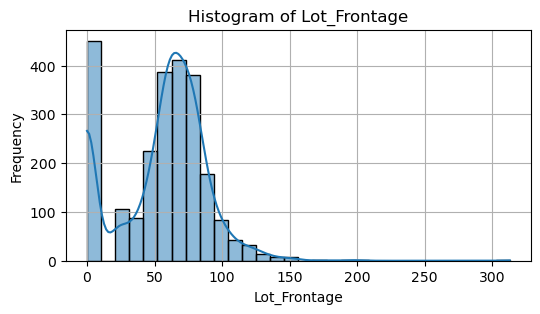

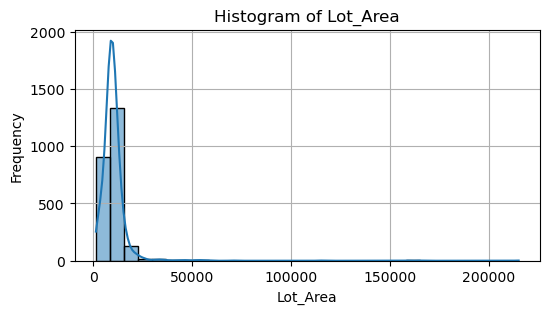

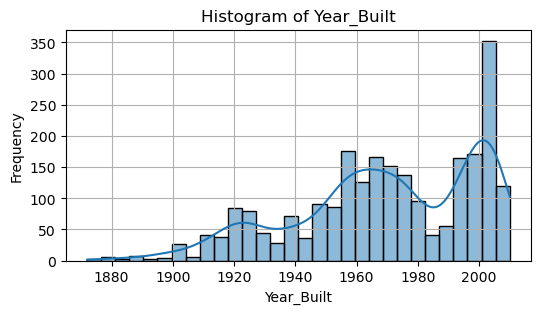

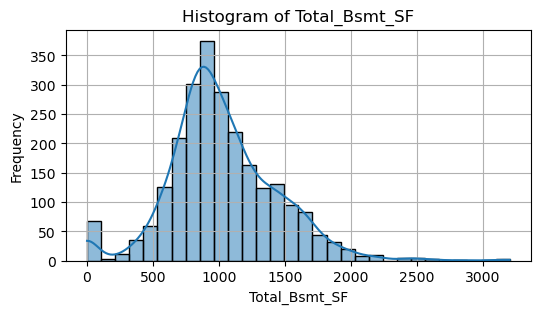

In [23]:
# plot the histograms
plot_histograms(housing_df, histogram_columns1)

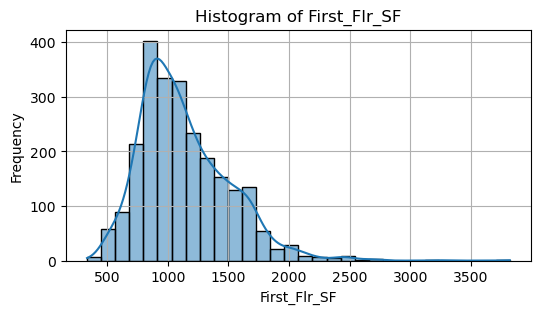

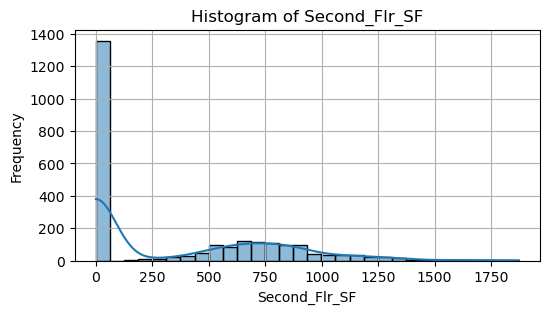

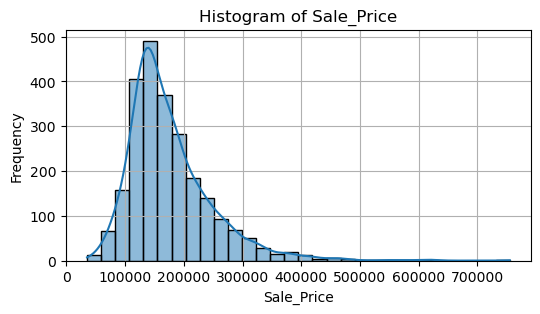

In [24]:
# plot the histograms
plot_histograms(housing_df, histogram_columns2)

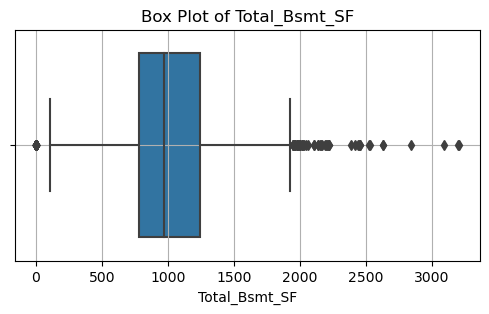

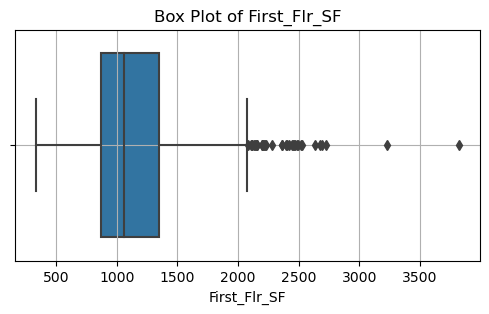

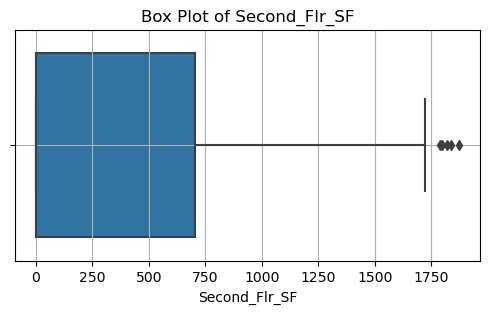

In [25]:
# plot the boxplots
plot_boxplots(housing_df, boxplot_columns)

From the Histogram and box plot, we can see how the the features are spread with some having long tails either to the left or right which shows a possible presence of outliers and the presence of outliers was confirmed in the box plots. 
For the box plot, the black rhombic shaped dots shows the outliers in the the features.
The total basement and first floor squarefeet looks like it has a normal distribution from the histogram but the long tail also shows the presence of outliers.

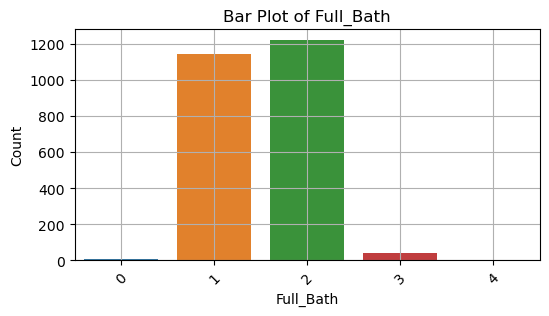

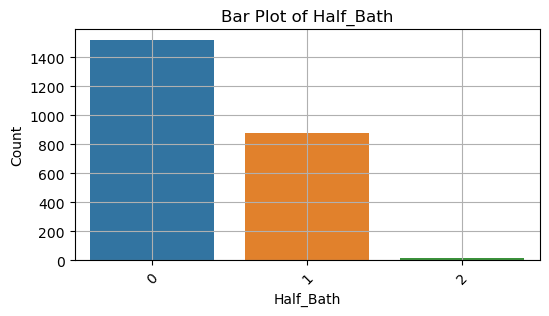

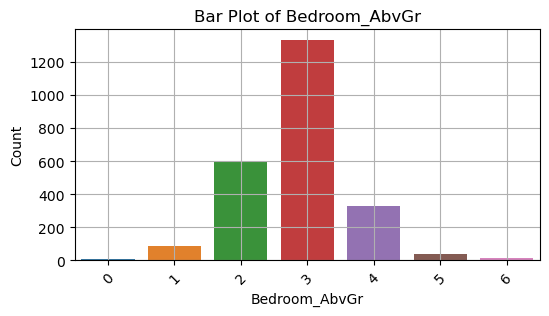

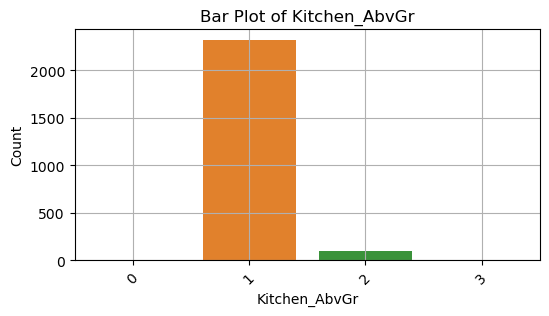

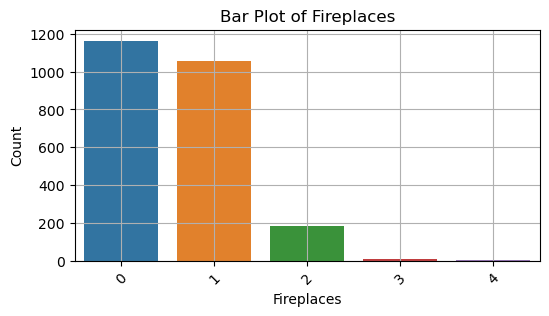

In [26]:
# plot the barplot
plot_barplots(housing_df, barplot_columns)

From the bar plots we see the distribution of the features with few unique values.
We can deduce the following:
- The houses in the dataset are mainly houses with 1 or 2 full bathrooms.
- Most of the houses has zero half bath while few of them has 1
- Most of the houses has 3 bedroom above ground(basement level)
- Most house has kitchen above ground(basement level)
- Most houses has zero or  fireplaces

### Task 2.2 -  Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

The EDA will be carried out as follows to have a comprehensive overview of our dataset:

- Graphical Multivariate Analysis
- Non-Graphical Multivariate Analysis

The relationship between features and target variable is very important as it helps understand the way these features affect the target and also when building our model we make better decision on which features we will use to build our model as it is sometimes important to select drop features that do not have relevance or correlation to the target variable when training the model.

## Visualising the relationship between the numerical variables and the Target(Sale_Price)

__Hypothesis: There is a relationship between each numeric feature and the target variable(Sales Price)__

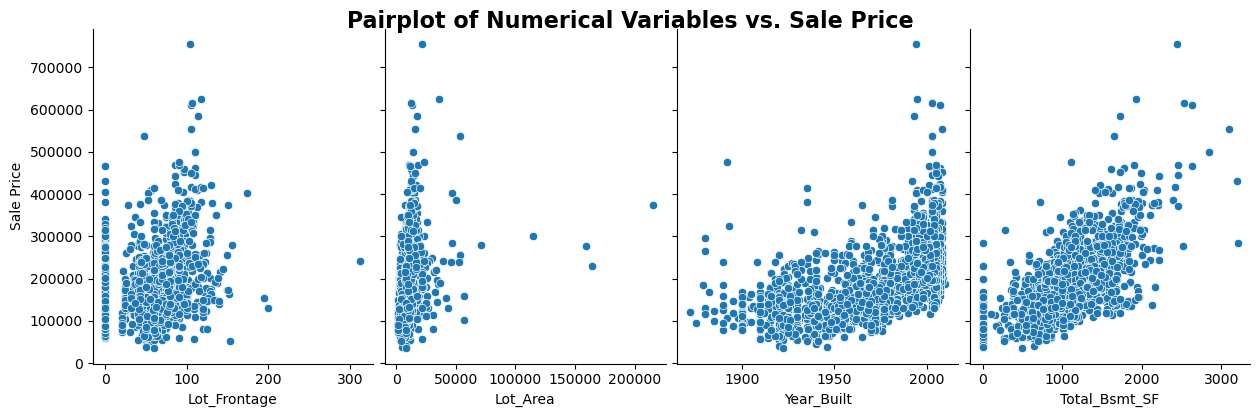

In [27]:
# Pair plot for numerical variables without palette
pairplot = sns.pairplot(housing_df, 
                       x_vars=['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF'], 
                       y_vars='Sale_Price', kind='scatter', height=4, aspect=0.8)

# Set titles and labels
pairplot.fig.suptitle('Pairplot of Numerical Variables vs. Sale Price', y=1.02, fontsize=16, fontweight='bold')

pairplot.set(ylabel='Sale Price')

# Remove spines for a clean look
for ax in pairplot.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

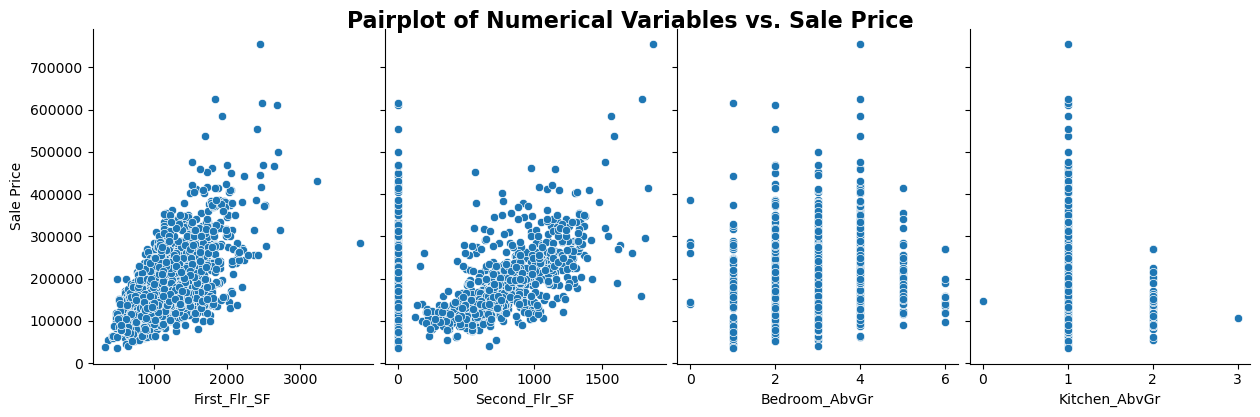

In [28]:
# Pair plot for numerical variables without palette
pairplot = sns.pairplot(housing_df, 
                       x_vars=['First_Flr_SF', 'Second_Flr_SF', 'Bedroom_AbvGr', 'Kitchen_AbvGr', ], 
                       y_vars='Sale_Price', kind='scatter', height=4, aspect=0.8)

# Set titles and labels
pairplot.fig.suptitle('Pairplot of Numerical Variables vs. Sale Price', y=1.02, fontsize=16, fontweight='bold')

x_vars=['Lot_Frontage', 'Lot_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF']
# for i in x_vars:
#     # Customize axis labels
pairplot.set(ylabel='Sale Price')

# Remove spines for a clean look
for ax in pairplot.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

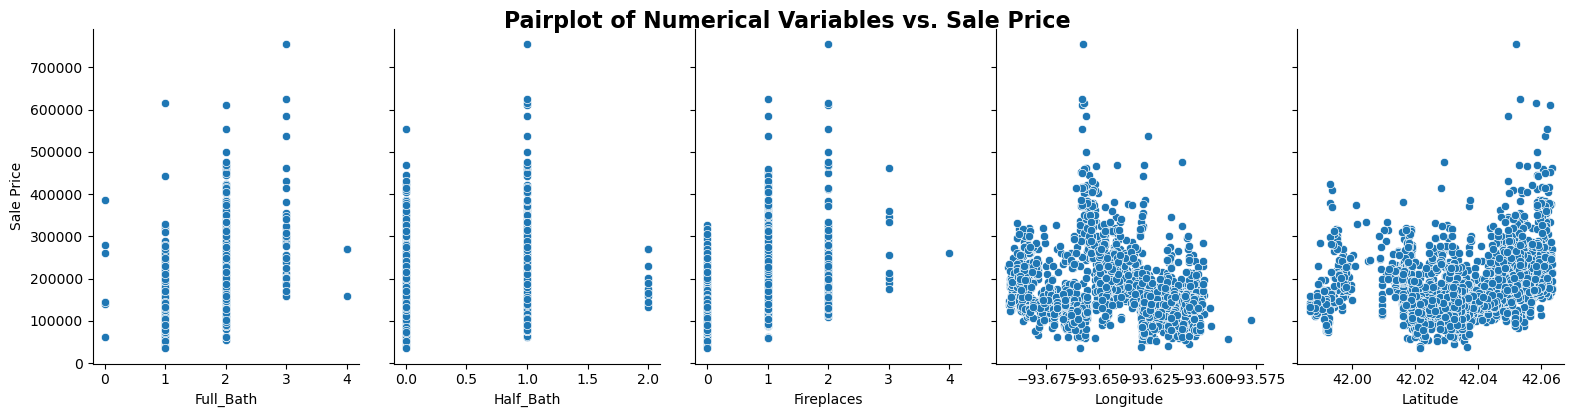

In [29]:
# Pair plot for numerical variables without palette
pairplot = sns.pairplot(housing_df, 
                       x_vars=[ 'Full_Bath', 'Half_Bath','Fireplaces', 'Longitude', 'Latitude'], 
                       y_vars='Sale_Price', kind='scatter', height=4, aspect=0.8)

# Set titles and labels
pairplot.fig.suptitle('Pairplot of Numerical Variables vs. Sale Price', y=1.02, fontsize=16, fontweight='bold')

# Customize axis labels
pairplot.set(ylabel='Sale Price')

# Remove spines for a clean look
for ax in pairplot.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [30]:
# Box plot for Fire places vs sales price
plt.figure(figsize= (8,6))
box_year_built = px.box(housing_df, x='Fireplaces', y='Sale_Price', 
                        title='Box Plot of Sale Price by Number of Fireplace',
                        labels={'Year_Built': 'Year Built', 'Sale_Price': 'Sale Price'},
                        template='plotly_white', color_discrete_sequence=['#e74c3c'])

box_year_built.show()

<Figure size 800x600 with 0 Axes>

In [31]:
# Box plot for Year_Built vs sales price
box_year_built = px.box(housing_df, x='Year_Built', y='Sale_Price', 
                        title='Box Plot of Sale Price by Year Built',
                        labels={'Year_Built': 'Year Built', 'Sale_Price': 'Sale Price'},
                        template='plotly_white', color_discrete_sequence=['#e74c3c'])
box_year_built.show()

In [32]:
# Box plot for Second floor Sf vs sales price
box_year_built = px.box(housing_df, x='Second_Flr_SF', y='Sale_Price', 
                        title='Box Plot of Sale Price by Second Floor SF',
                        labels={'Year_Built': 'Year Built', 'Sale_Price': 'Sale Price'},
                        template='plotly_white', color_discrete_sequence=['#e74c3c'])
box_year_built.show()

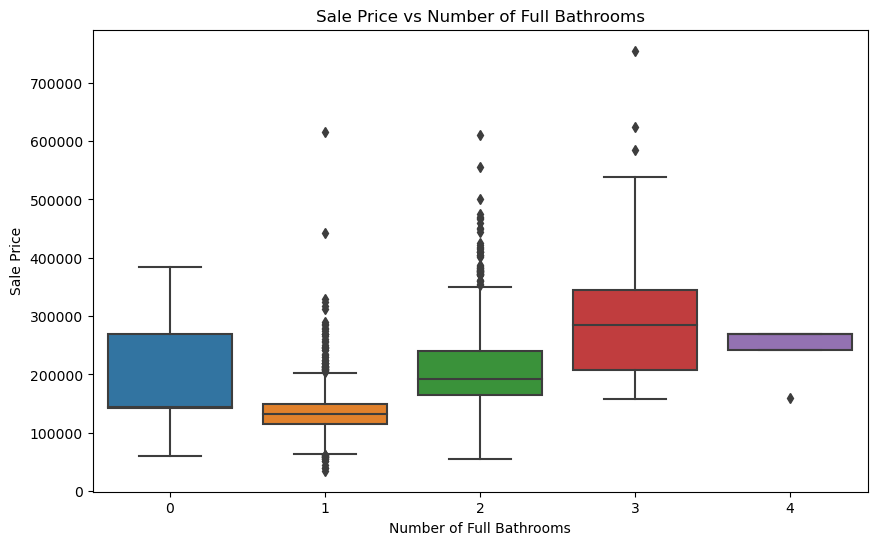

In [33]:
# Visualization: Boxplot of sales price and full bathroom
plt.figure(figsize=(10, 6))
sns.boxplot(x='Full_Bath', y='Sale_Price', data=housing_df)
plt.title('Sale Price vs Number of Full Bathrooms')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price')
plt.show()

#### Calculate the correlation coefficient for the numerical variables. This will majorly help to visualize how the features affect the sales price.

In [34]:
# calculate the correlation matrix
correlation_matrix = housing_df.corr(numeric_only=True)

# calculate the correlation fo each feature with the target
correlation_with_target = correlation_matrix['Sale_Price'].abs().sort_values(ascending=False)

In [35]:
correlation_matrix

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  \
Lot_Frontage       1.000000  0.111752   -0.032577       0.139344   
Lot_Area           0.111752  1.000000    0.006124       0.208979   
Year_Built        -0.032577  0.006124    1.000000       0.384244   
Total_Bsmt_SF      0.139344  0.208979    0.384244       1.000000   
First_Flr_SF       0.196271  0.305419    0.273809       0.766565   
Second_Flr_SF     -0.020051  0.015046    0.019209      -0.215670   
Full_Bath          0.046891  0.119138    0.441418       0.316821   
Half_Bath         -0.044356  0.010567    0.274389      -0.087898   
Bedroom_AbvGr      0.107344  0.138169   -0.042448       0.090679   
Kitchen_AbvGr      0.020522 -0.013489   -0.137998      -0.028391   
Fireplaces         0.029240  0.238730    0.159663       0.313337   
Longitude         -0.002233 -0.098893   -0.424697      -0.153146   
Latitude           0.026206 -0.051481    0.212627       0.164925   
Sale_Price         0.160398  0.275066    0.533158       0.642354   

               First_Flr_SF  Second_Flr_SF  Full_Bath  Half_Bath  \
Lot_Frontage       0.196271      -0.020051   0.046891  -0.044356   
Lot_Area           0.305419       0.015046   0.119138   0.010567   
Year_Built         0.273809       0.019209   0.441418   0.274389   
Total_Bsmt_SF      0.766565      -0.215670   0.316821  -0.087898   
First_Flr_SF       1.000000      -0.265052   0.366844  -0.136403   
Second_Flr_SF     -0.265052       1.000000   0.420907   0.626065   
Full_Bath          0.366844       0.420907   1.000000   0.176045   
Half_Bath         -0.136403       0.626065   0.176045   1.000000   
Bedroom_AbvGr      0.137210       0.510590   0.382962   0.270618   
Kitchen_AbvGr      0.076361       0.083579   0.196142  -0.044196   
Fireplaces         0.400392       0.175173   0.244596   0.187236   
Longitude         -0.115597      -0.058138  -0.225956  -0.113804   
Latitude           0.125977       0.087136   0.186127   0.154415   
Sale_Price         0.634672       0.293338   0.548635   0.292314   

               Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude  Latitude  \
Lot_Frontage        0.107344       0.020522    0.029240  -0.002233  0.026206   
Lot_Area            0.138169      -0.013489    0.238730  -0.098893 -0.051481   
Year_Built         -0.042448      -0.137998    0.159663  -0.424697  0.212627   
Total_Bsmt_SF       0.090679      -0.028391    0.313337  -0.153146  0.164925   
First_Flr_SF        0.137210       0.076361    0.400392  -0.115597  0.125977   
Second_Flr_SF       0.510590       0.083579    0.175173  -0.058138  0.087136   
Full_Bath           0.382962       0.196142    0.244596  -0.225956  0.186127   
Half_Bath           0.270618      -0.044196    0.187236  -0.113804  0.154415   
Bedroom_AbvGr       1.000000       0.241605    0.097119  -0.034338  0.023603   
Kitchen_AbvGr       0.241605       1.000000   -0.109825   0.079593 -0.049201   
Fireplaces          0.097119      -0.109825    1.000000  -0.047115  0.145832   
Longitude          -0.034338       0.079593   -0.047115   1.000000  0.039064   
Latitude            0.023603      -0.049201    0.145832   0.039064  1.000000   
Sale_Price          0.183634      -0.114394    0.493381  -0.262492  0.246785   

               Sale_Price  
Lot_Frontage     0.160398  
Lot_Area         0.275066  
Year_Built       0.533158  
Total_Bsmt_SF    0.642354  
First_Flr_SF     0.634672  
Second_Flr_SF    0.293338  
Full_Bath        0.548635  
Half_Bath        0.292314  
Bedroom_AbvGr    0.183634  
Kitchen_AbvGr   -0.114394  
Fireplaces       0.493381  
Longitude       -0.262492  
Latitude         0.246785  
Sale_Price       1.000000

In [36]:
correlation_with_target

Sale_Price       1.000000
Total_Bsmt_SF    0.642354
First_Flr_SF     0.634672
Full_Bath        0.548635
Year_Built       0.533158
Fireplaces       0.493381
Second_Flr_SF    0.293338
Half_Bath        0.292314
Lot_Area         0.275066
Longitude        0.262492
Latitude         0.246785
Bedroom_AbvGr    0.183634
Lot_Frontage     0.160398
Kitchen_AbvGr    0.114394
Name: Sale_Price, dtype: float64

__The more correlation tends to zero coefficient tends to zero, the more it shows no correlation with the target variable. This is important to see as it helps us decide which feature to use in training our model.__

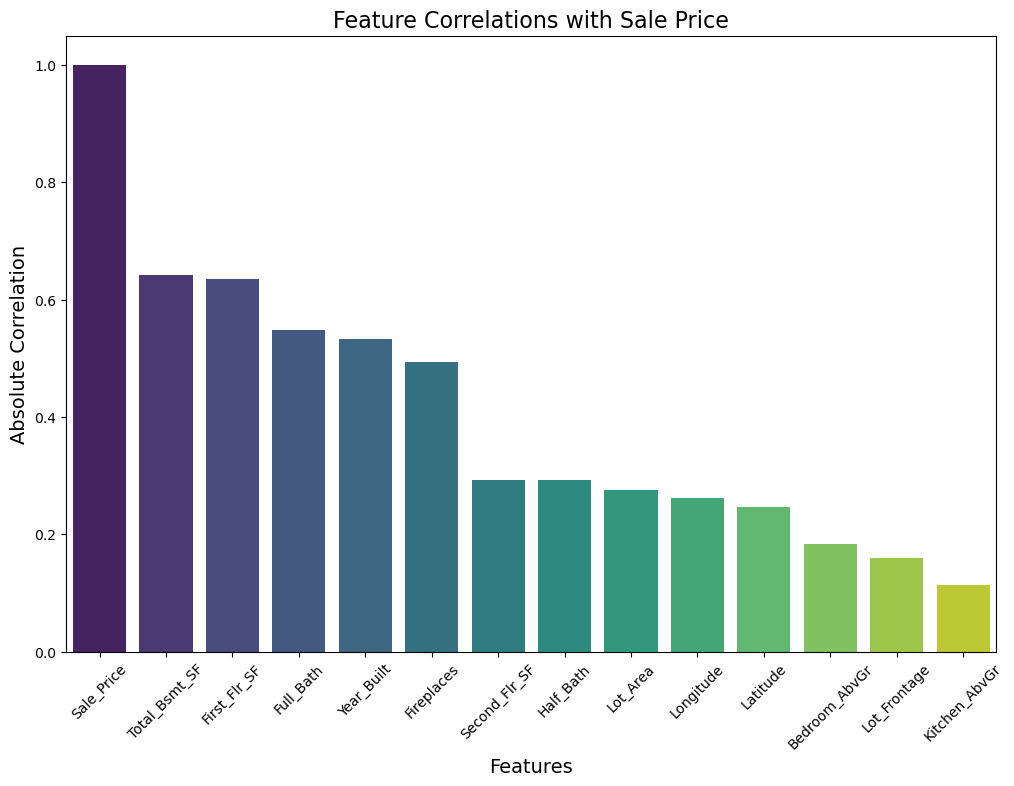

In [37]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')

# Add titles and labels
plt.title('Feature Correlations with Sale Price', fontsize=16)
plt.ylabel('Absolute Correlation', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tick_params(axis='x', rotation=45)

# Display the plot
plt.show()

We can say that the variables that has most effect on the sales price are Total square feet of basement area(Total_Bsmt_SF), First Floor square feet(First_Flr_SF), Full bathroom, Year built, fireplace.

### Insight:

To prove the hypothesis, I can say that yes, there is a relationship between all the numeric features and target variable and it is good to note that while they all have relationship with the target feature, the correlation or how much the features affect or determine the sales price of a house varies.

__An explanation of the features that have a good correlation with the target variable and the possible reason why they might have such effect on the sales price__

__Number of Fireplaces__ can affect the price of a house. Typically, we can say that there is a potential increase in house prices with increase in the number of fireplaces. High number of fireplaces can also indicate high number of room spaces and fireplaces is a good selling point especially for houses in cold regions.

For the __Year built__, we can see that as the year increases, so does the sales price increase. This is could be because modern houses will typically cost more than old one as the cost of construction, furnitures, finishes etc in modern house will cost more than that of old house and also the economy tends to detoriate the value of money.

For the __Second Floor_SF__, although houses with zero second floor still has houses with high price, we can still see that with an increase in the second floor square feet, there is an increase in the sales price. 
This feature also showed a weak correlation and this could be because there are bungalow houses that can be big, have all the features that can make a house expensive.

For the __Total basement square feet__, there is a clear incease in salesprice with increase in the total basement sf and this feature also showed a positive strong correlation with sales price. This could be due to many reasons:
- Basements add significant value to a property due to the additional space they provide, which can be used for various purposes like usable living space, such as extra bedrooms, family rooms, recreation rooms, home offices, or even rental units especially if it is finished and can be valuable for storage, workshops, or future finishing potential if not finished.
- Basements often house utility rooms for HVAC systems, water heaters, laundry rooms, and other essential home infrastructure, freeing up space on the main floors.
- Buyers might see the potential to finish an unfinished basement, adding even more living space and increasing the property's value.
- In colder climates, basements can provide insulated space that helps keep the house warmer and reduces heating costs. In some regions, basements can offer cooler spaces during hot summers.
- Basements can also offer safety during severe weather conditions, such as tornadoes or hurricanes.

For the __Full bath__, we can see that the more the number of full bathrooms, the more the sales price tend to go higher. This could also be for some reasons:
- Increased Convenience: More full bathrooms mean more convenience for the occupants, reducing waiting times and making morning and evening routines smoother, especially for larger families.
- Additional full bathrooms can better accommodate guests, making the home more hospitable.
- Homes with more full bathrooms are often perceived as more luxurious and comfortable, increasing their attractiveness to potential buyers.
- Modern Living Standards: In modern housing markets, multiple full bathrooms are often considered a standard feature, particularly in larger homes.
- For families, having multiple full bathrooms is a practical necessity, especially during peak usage times.
- Privacy: Additional full bathrooms can provide more privacy for family members and guests.
- Larger homes typically have more full bathrooms to match the number of bedrooms and overall size, which can increase the property value.
- Building and fitting additional full bathrooms involve higher construction costs, which are typically reflected in the sale price.
- Homes with more bathrooms might also feature higher quality fixtures and finishes, further increasing the cost and perceived value.

## Visualising the relationship between the non- numerical variables and the Target(Sale_Price)

__Hypothesis: There is a relationship between each non-numeric feature and the target variable(Sales Price)__

plots to show the relationship between the non-numerical variables and the target feature will also help us to decide which non-numeric feature we will use to train our model.

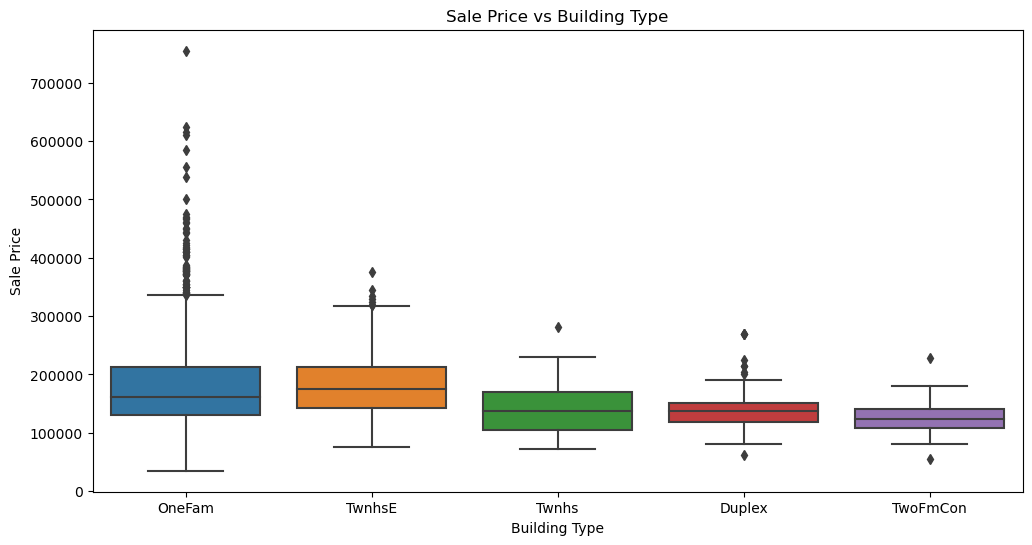

In [38]:
# plot a box plot to show the relationship of building type and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bldg_Type', y='Sale_Price', data=housing_df)
plt.title('Sale Price vs Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.show()

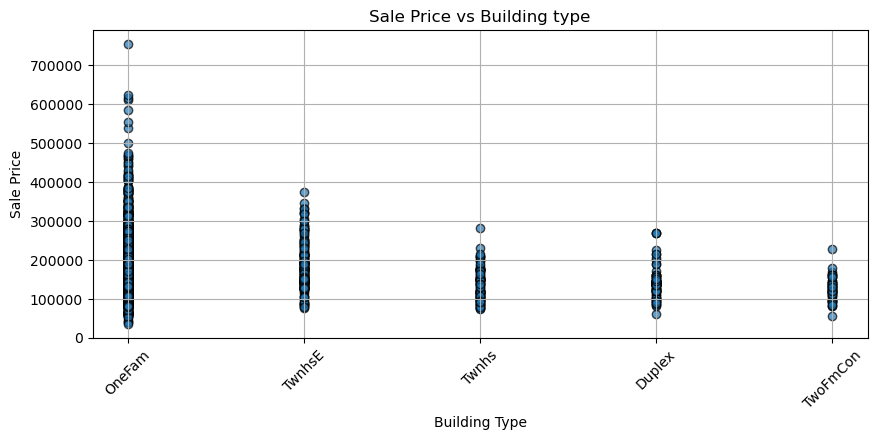

In [39]:
# plot a scatter plot to show the relationship of building type and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(10, 4))
plt.scatter(housing_df['Bldg_Type'], housing_df['Sale_Price'], alpha=0.7, edgecolor='black')
plt.title('Sale Price vs Building type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tick_params(axis= 'x', rotation = 45)
plt.show()

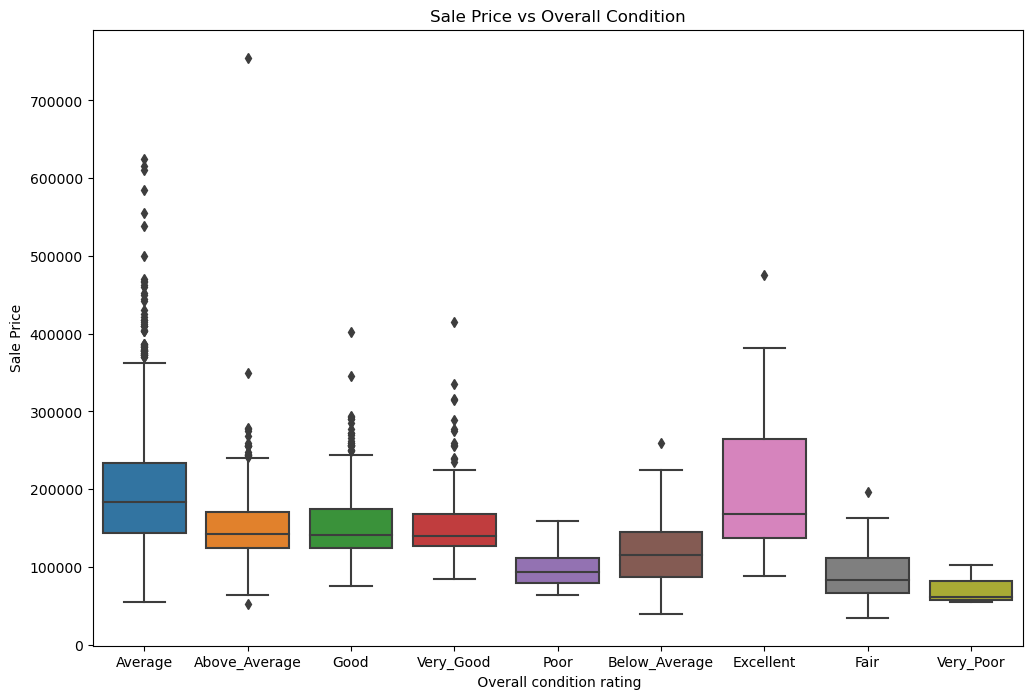

In [40]:
# plot a box plot to show the relationship of overall condition and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(12, 8))
sns.boxplot(x='Overall_Cond', y='Sale_Price', data=housing_df)
plt.title('Sale Price vs Overall Condition')
plt.xlabel(' Overall condition rating')
plt.ylabel('Sale Price')
plt.show()

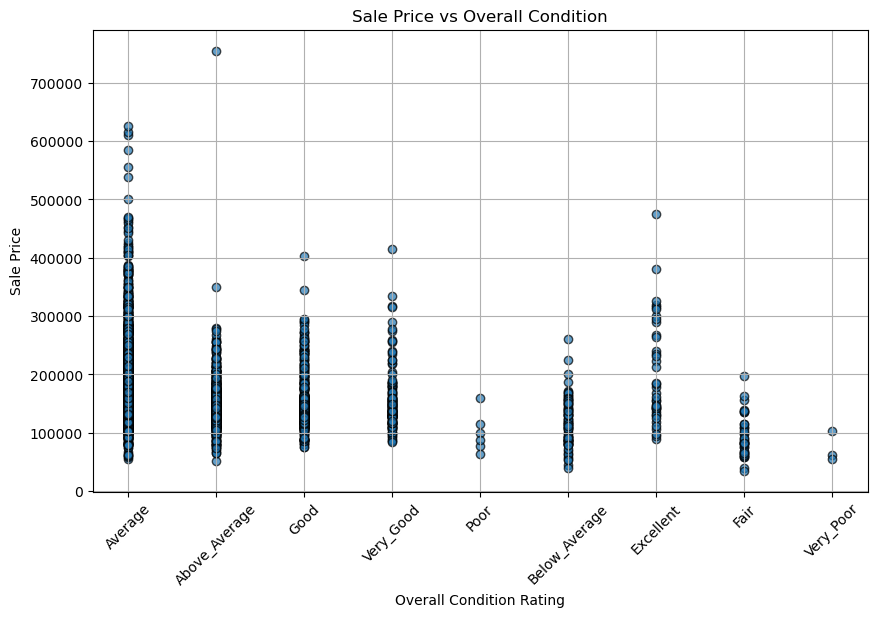

In [41]:
# plot a scatter plot to show the relationship of overall condition and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['Overall_Cond'], housing_df['Sale_Price'], alpha=0.7, edgecolor='black')
plt.title('Sale Price vs Overall Condition')
plt.xlabel('Overall Condition Rating')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tick_params(axis= 'x', rotation = 45)
plt.show()

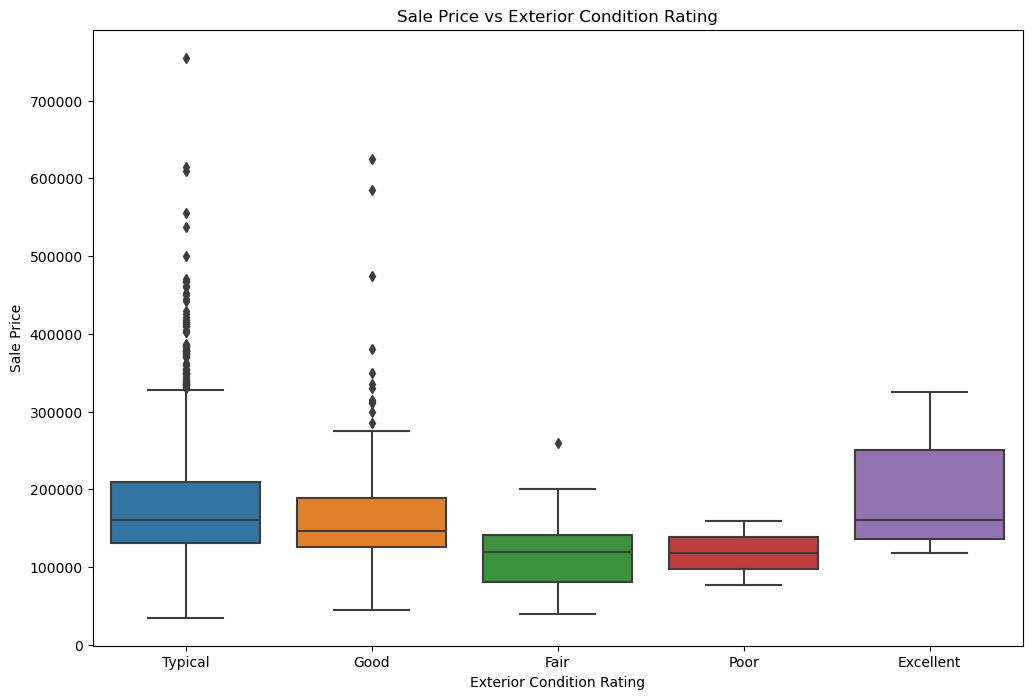

In [42]:
# plot a box plot to show the relationship of exterior condition and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(12, 8))
sns.boxplot(x='Exter_Cond', y='Sale_Price', data=housing_df)
plt.title('Sale Price vs Exterior Condition Rating')
plt.xlabel('Exterior Condition Rating')
plt.ylabel('Sale Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

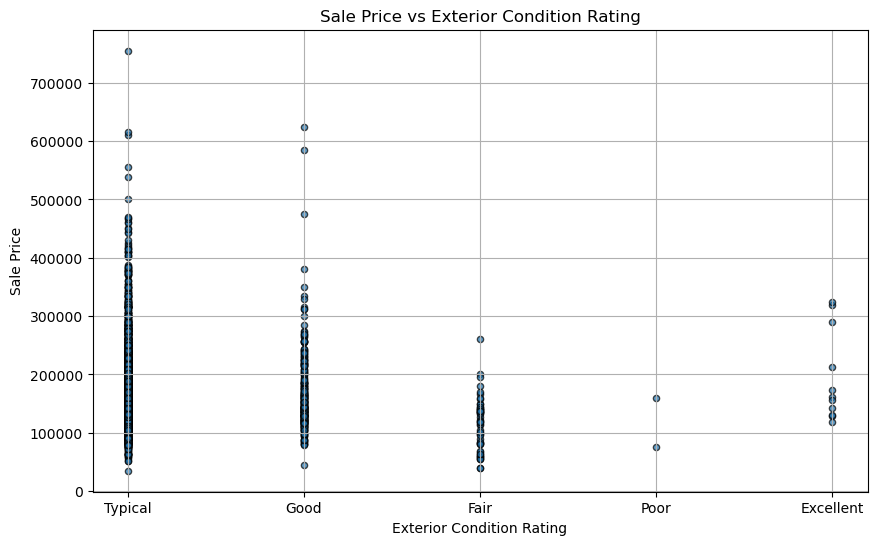

In [43]:
# plot a scatter plot to show the relationship of exterior condition and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(10, 6))
housing_df.plot(kind='scatter', x='Exter_Cond', y='Sale_Price', alpha=0.7, edgecolor='black', figsize=(10, 6))
plt.title('Sale Price vs Exterior Condition Rating')
plt.xlabel('Exterior Condition Rating')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

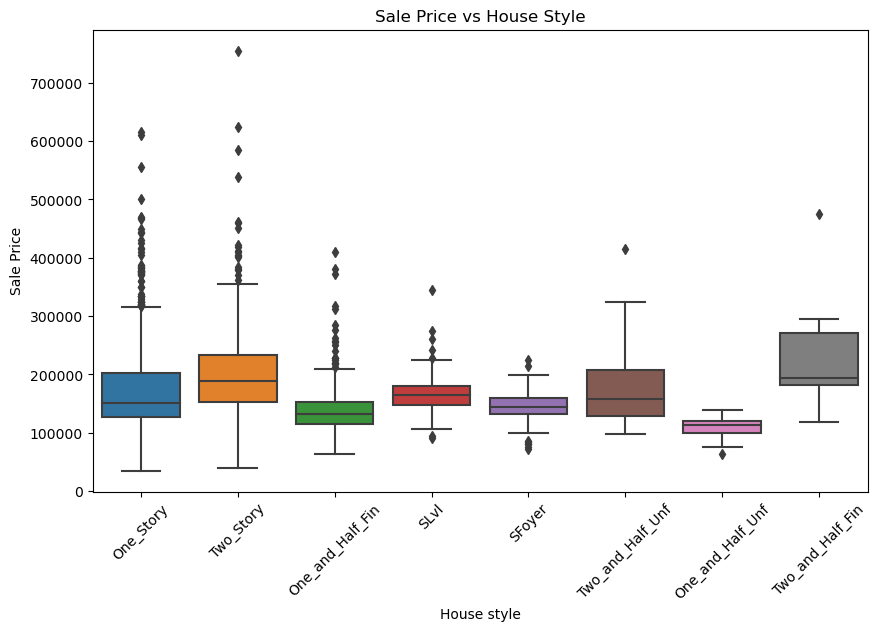

In [44]:
# plot a box plot to show the relationship of House style and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='House_Style', y='Sale_Price', data=housing_df)
plt.title('Sale Price vs House Style')
plt.xlabel('House style')
plt.ylabel('Sale Price')
plt.tick_params(axis= 'x', rotation = 45)
plt.show()

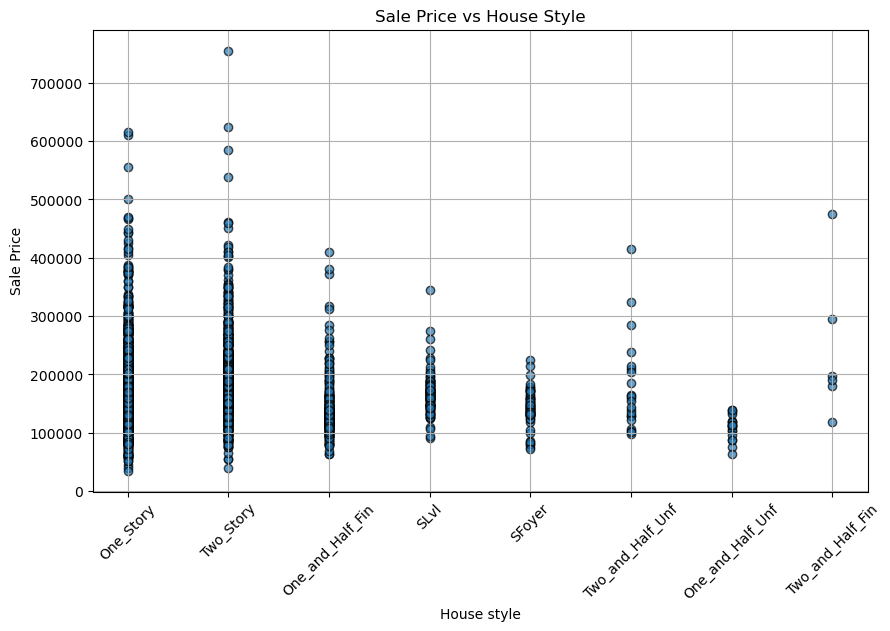

In [45]:
# plot a scatter plot to show the relationship of House style and sales price
# set the display size, title, x and y labels
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['House_Style'], housing_df['Sale_Price'], alpha=0.7, edgecolor='black')
plt.title('Sale Price vs House Style')
plt.xlabel('House style')
plt.ylabel('Sale Price')
plt.grid(True)
plt.tick_params(axis= 'x', rotation = 45)
plt.show()

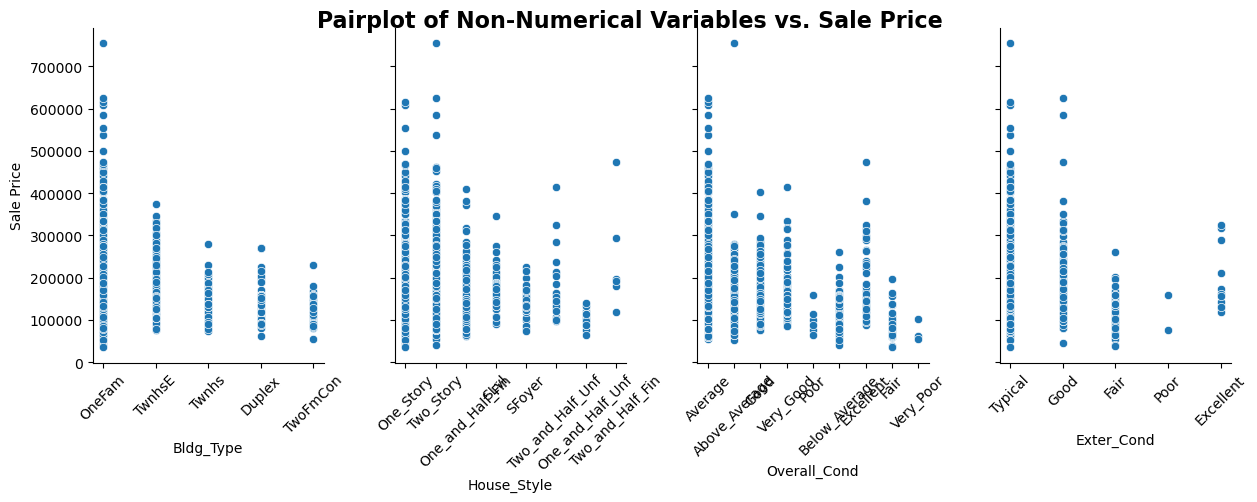

In [46]:
# Pair plot for non-numerical variables without palette
pairplot = sns.pairplot(housing_df, 
                       x_vars=[ 'Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond'], 
                       y_vars='Sale_Price', kind='scatter', height=4, aspect=0.8)

# Set titles and labels
pairplot.fig.suptitle('Pairplot of Non-Numerical Variables vs. Sale Price', y=1.02, fontsize=16, fontweight='bold')

# Customize axis labels
pairplot.set(ylabel='Sale Price')
    
pairplot.tick_params(axis= 'x', rotation = 45)

# Remove spines for a clean look
for ax in pairplot.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


plt.show()

In [47]:
# Bar plot for overall condtion
bar_bldg_type = px.bar(housing_df['Overall_Cond'].value_counts(), x=housing_df['Overall_Cond'].value_counts().index,
                       y=housing_df['Overall_Cond'].value_counts().values, labels={'x': 'Overall Condition rating', 
                                                                                   'y': 'Count'},
                       title='Distribution of Overall condition',
                       template='plotly_white', color_discrete_sequence=['#3498db'])
bar_bldg_type.show()

In [48]:
# Bar plot for Bldg_Type
bar_bldg_type = px.bar(housing_df['Bldg_Type'].value_counts(), x=housing_df['Bldg_Type'].value_counts().index,
                       y=housing_df['Bldg_Type'].value_counts().values, labels={'x': 'Building Type', 'y': 'Count'},
                       title='Distribution of Building Types',
                       template='plotly_white', color_discrete_sequence=['#3498db'])
bar_bldg_type.show()

In [49]:
# Scatter plot for Longitude and Latitude colored by Sale_Price
scatter_map = px.scatter_mapbox(housing_df, lat='Latitude', lon='Longitude', color='Sale_Price',
                                size='Sale_Price', hover_name='Sale_Price',
                                title='Geographical Distribution of Sale Price',
                                mapbox_style='open-street-map',
                                color_continuous_scale=px.colors.sequential.Viridis)
scatter_map.update_layout(margin=dict(l=0, r=0, b=0, t=40))
scatter_map.show()

### Insight: 

To answer our hypothesis, there is a relationship between the categorical features and sales price.

From the analysis of the relaionship between the non-numerical features and the target feature, we draw the following insight:

__BUILDING TYPE:__ The type of building can affect the price of a house and from the pairplot we see that onefam seems to have both low sales price and high sales price. This could either be because the other house types does not have enough representative entries or even the location. More explanation on possible reasons why onefam houses can be more expensive are:

__OneFam (One Family)__: This category represents a single-family detached home, which is a standalone residential structure meant for occupancy by one family. These homes are not connected to any other residences and usually come with a private yard or land. From the plots we can see that most of the houses are onefam building type and also the houses that tends to have high prices are also the one-fam building type.

__Key Characteristics of OneFam Building Type:__
- Detached Structure: The house is not attached to any other residential structure.
- Single Occupancy: Designed for one family or household.
- Private Land: Often includes a yard, garden, or driveway that is part of the property.
- Customization: These homes offer more opportunities for customization, such as renovations and extensions, compared to attached housing types like townhouses or apartments.
- Higher Value: Typically, single-family detached homes can have higher property values compared to other types like duplexes or townhomes, depending on location and market conditions. This type of hose is also in high demand comapred to the other type of houses because of its features.


__OVERALL CONDITION__

For the overall condition is on a scale of 1-10, from very poor to excellent. We see from the plots that the most occured is the __average__  and also the houses that tend to have higher prices are the average and good houses where good houses mean better than avarage houses. The better the overall condition of a house, the higher the sales price should be but fromm the graph it seems like it is not typically the case and this could be due to some factor which hugely might be location realted. In summary, while the physical condition of a house is important, various external and contextual factors can make an average house more expensive than an excellent house. The market often places significant value on location, land, future potential, and unique attributes that go beyond the condition of the property itself.

__EXTERIOR CONDITION__

The Exterior Condition feature scales from poor to excellent. It typically refers to the overall condition of the exterior parts of the house. This feature assesses the state of the home’s outside structure, which might include the siding, roof, windows, doors, and other external components. The higher the exterior condition rating the higher the price but from the plots it does not typically depict that and this could be as a reult of other factors like location, ineterior of the house, land size etc.

__HOUSE STYLE__

There are 8 house style in the data and the most common ones are the one storey known as bungalow in Nigeria, two story and the one and half finished which is a one story building and a partial second story that is finished with two story having the highest tendency of high pricing and this is understandable because two story means bigger ground floor and upper floor space, well demarcated and more functionality.

In summary, the impact of housing style on price is multifaceted and influenced by buyer preferences, functionality, architectural appeal, market trends, location and the condition of the property. Understanding these factors can help in analyzing housing prices and making informed decisions in the real estate market.

__The correlation between these categorical features and the sales price will be calculated later after encoding them to numeric.__


## Detect and handle outliers


Handling outliers is crucial because they can significantly skew statistical results and distort the true relationships between variables, leading to inaccurate conclusions. Outliers can also negatively impact the performance of machine learning models by introducing noise and bias. Properly managing outliers ensures more reliable and robust analysis, leading to better insights and model performance.

#### Hypothesis: For a data collected from different houses in different locations, there will be the existence of outliers in the numericl features of the data.

In [50]:
# create numerical columns
num_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns

# create a dataframe for only numerical columns
num_df = housing_df[num_cols].drop(['Longitude', 'Latitude'], axis = 1) 

In [51]:
num_df.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0           141     31770        1960           1080          1656   
1            80     11622        1961            882           896   
2            81     14267        1958           1329          1329   
3            93     11160        1968           2110          2110   
4            74     13830        1997            928           928   

   Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0              0          1          0              3              1   
1              0          1          0              2              1   
2              0          1          1              3              1   
3              0          2          1              3              1   
4            701          2          1              3              1   

   Fireplaces  Sale_Price  
0           2      215000  
1           0      105000  
2           0      172000  
3           2      244000  
4           1      189900

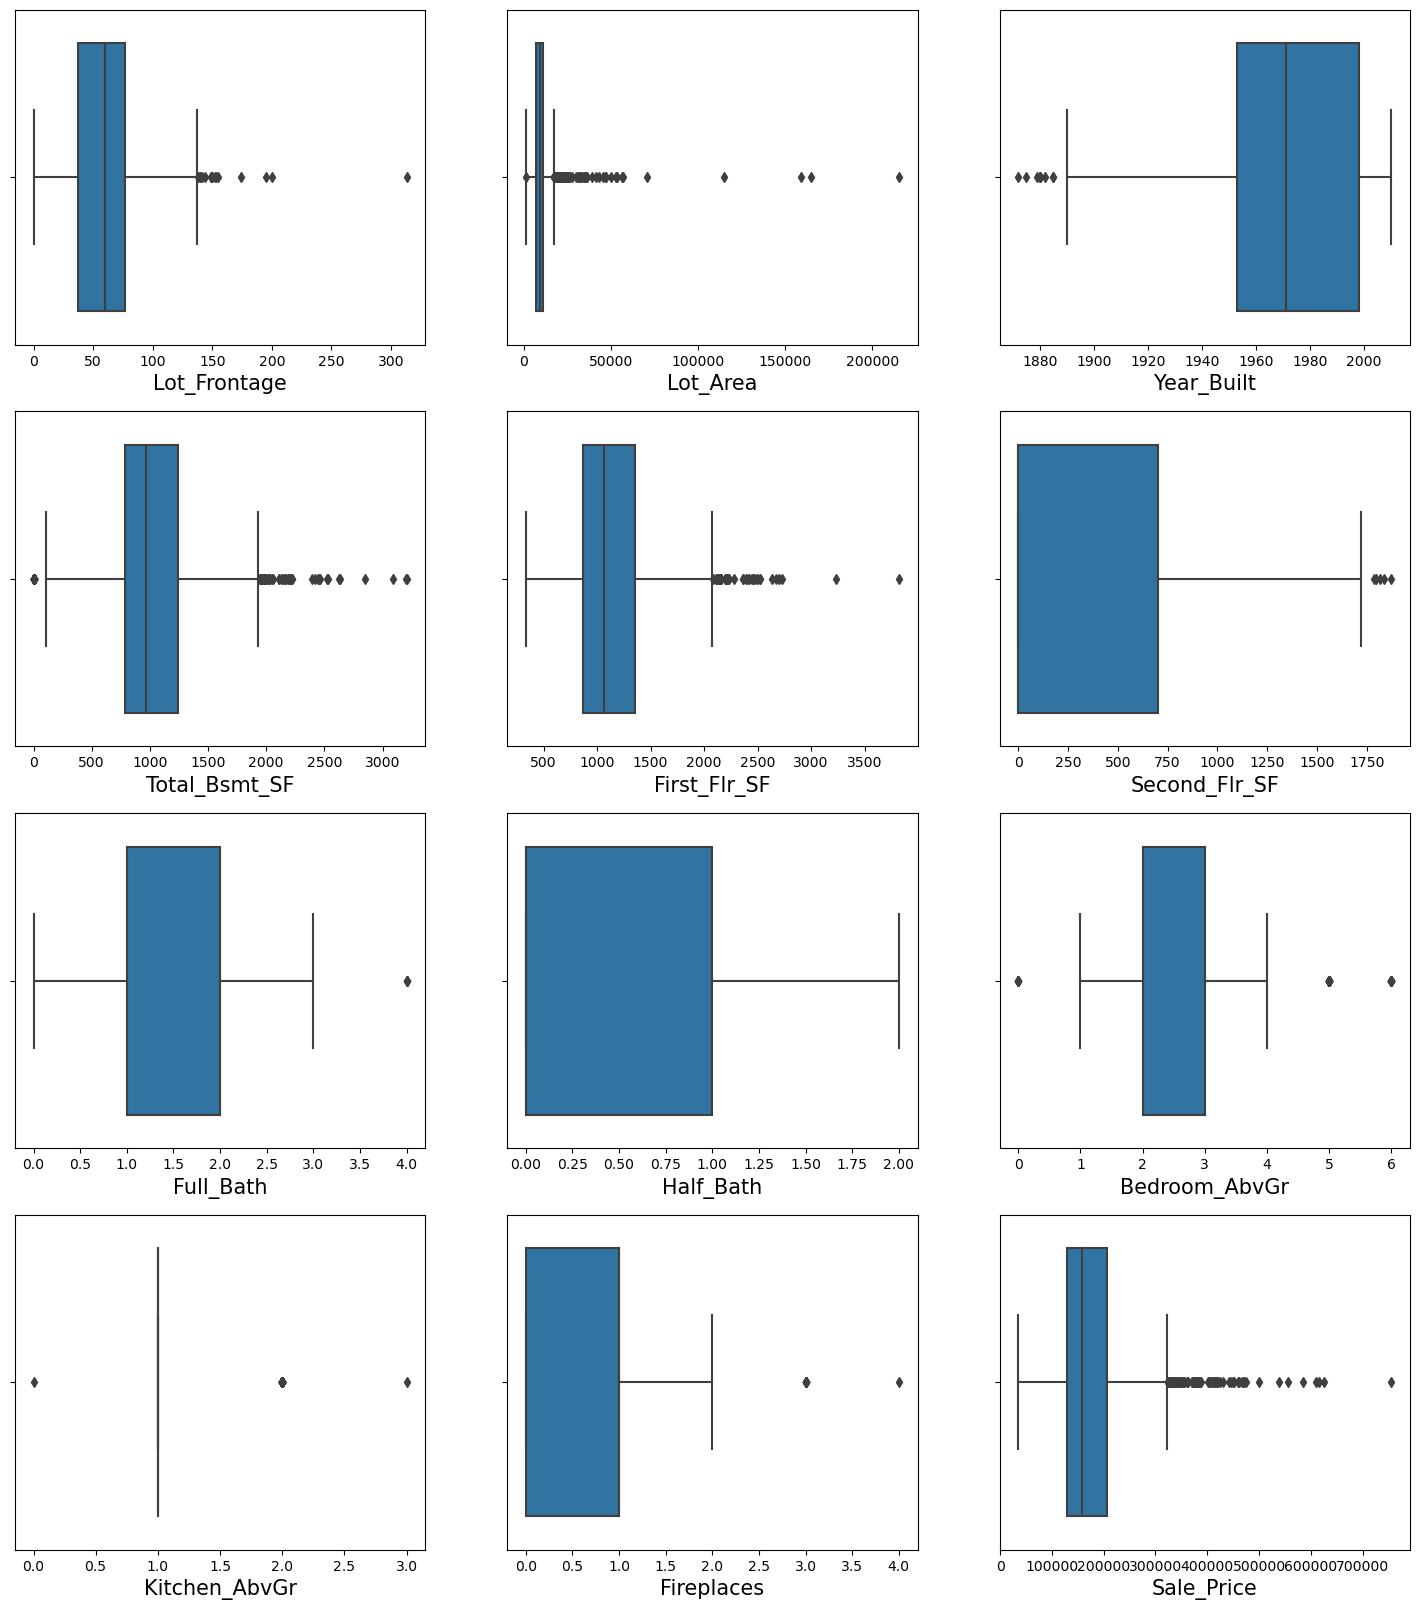

In [52]:
# plot a boxplot plot to help visualize the distribution of each numerical feature an thee outliers
plt.figure(figsize= (18, 20)) # set figure size
for i in range(len(num_df.columns)):
    plt.subplot(4, 3, i+1) # creates a subplot
    sns.boxplot(x = num_df.iloc[:, i])
    plt.xlabel(num_df.columns[i], size=15)

From the box plot we can see the features that have outliers and only the half bathroom feature is free of outliers while few other like full bath, Kitchen and bedroom above ground, fireplaces has very few outliers.

In [53]:
# Statistical method using IQR
def outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.8 * IQR
    upper_bound = Q3 + 1.8 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

In [54]:
for cols in num_cols:
    out = outliers(housing_df, cols)
    print(f'The outlier for {cols} are: {len(out)}')
    

The outlier for Lot_Frontage are: 9
The outlier for Lot_Area are: 84
The outlier for Year_Built are: 0
The outlier for Total_Bsmt_SF are: 27
The outlier for First_Flr_SF are: 22
The outlier for Second_Flr_SF are: 0
The outlier for Full_Bath are: 4
The outlier for Half_Bath are: 0
The outlier for Bedroom_AbvGr are: 61
The outlier for Kitchen_AbvGr are: 98
The outlier for Fireplaces are: 11
The outlier for Longitude are: 0
The outlier for Latitude are: 0
The outlier for Sale_Price are: 67


In [55]:
out_lotfront = outliers(housing_df, 'Lot_Frontage')
out_lotfront

Lot_Frontage  Lot_Area Bldg_Type       House_Style   Overall_Cond  \
16             152     12134    OneFam  One_and_Half_Fin           Good   
434            174     15138    OneFam         Two_Story        Average   
831            150    215245    OneFam         One_Story        Average   
1097           313     27650    OneFam         One_Story           Good   
1376           150     14137    OneFam            SFoyer        Average   
1418           195     41600  TwoFmCon         One_Story        Average   
1792           155     20064    OneFam         One_Story  Above_Average   
1925           200     43500    OneFam         One_Story        Average   
2234           153      4118    OneFam         One_Story  Below_Average   

      Year_Built Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
16          1988    Typical            559          1080            672   
434         1995    Typical           1462          1490           1304   
831         1965    Typical           2136          2036              0   
1097        1960    Typical            585          2069              0   
1376        1964    Typical           1200          1200              0   
1418        1969    Typical           1100          1424              0   
1792        1976    Typical            966          1743              0   
1925        1953    Typical              0          2034              0   
2234        1941    Typical            693           693              0   

      Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  \
16            2          0              4              1           0   
434           2          1              4              1           1   
831           2          0              3              1           2   
1097          2          0              4              1           1   
1376          1          0              3              1           0   
1418          1          1              3              1           0   
1792          0          1              0              1           2   
1925          1          0              2              1           0   
2234          1          0              2              1           0   

      Longitude   Latitude  Sale_Price  
16   -93.623595  42.060351      164000  
434  -93.657163  42.053911      403000  
831  -93.652119  42.001380      375000  
1097 -93.604106  42.039568      242000  
1376 -93.606374  41.993185      173000  
1418 -93.622874  42.060096      155000  
1792 -93.683612  42.024305      279000  
1925 -93.610118  41.992318      130000  
2234 -93.622624  42.026890       52500

In [56]:
out_lot_area = outliers(housing_df, 'Lot_Area')
out_lot_area

Lot_Frontage  Lot_Area Bldg_Type       House_Style   Overall_Cond  \
0              141     31770    OneFam         One_Story        Average   
15              47     53504    OneFam         Two_Story        Average   
17             140     19138    OneFam         One_Story        Average   
100              0     18837    OneFam  One_and_Half_Fin        Average   
120              0     19900    OneFam         One_Story        Average   
182              0     24090    OneFam         Two_Story           Good   
201              0     20062    OneFam         One_Story           Good   
204              0     23595    OneFam         One_Story  Above_Average   
263             85     19645    OneFam              SLvl  Above_Average   
276              0     57200    OneFam         One_Story        Average   
294              0     26142    OneFam         One_Story           Good   
430              0     24682    OneFam         Two_Story        Average   
443             52     46589    OneFam         Two_Story           Good   
444              0     29959    OneFam         Two_Story  Above_Average   
556            120     19296    OneFam              SLvl        Average   
635            144     21384    OneFam         Two_Story  Above_Average   
698             66     19255    OneFam              SLvl        Average   
704            120     26400    OneFam         Two_Story           Good   
818              0     21695    OneFam         One_Story      Excellent   
823            109     21780    OneFam         One_Story  Below_Average   
831            150    215245    OneFam         One_Story        Average   
843            100     21750    OneFam         One_Story  Below_Average   
871             57     21872    OneFam         Two_Story        Average   
885              0     31220    OneFam         One_Story           Poor   
887             46     20544    OneFam         Two_Story  Above_Average   
999             95     19508    OneFam         One_Story        Average   
1097           313     27650    OneFam         One_Story           Good   
1190           115     21286    OneFam  One_and_Half_Fin        Average   
1212            82     20270    OneFam         One_Story  Above_Average   
1213            73     39104    OneFam         One_Story           Good   
1214             0     53227    OneFam         One_Story  Above_Average   
1218            75     45600    OneFam  One_and_Half_Fin      Very_Good   
1219            85     19550    OneFam         One_Story           Good   
1220            66     21780    OneFam  One_and_Half_Fin           Good   
1301           123     47007    OneFam         One_Story           Good   
1336            56     26073    OneFam         One_Story        Average   
1356             0     23730    OneFam         One_Story        Average   
1362             0    164660  TwoFmCon  One_and_Half_Fin  Above_Average   
1385           100     21750    OneFam         One_Story        Average   
1394             0     56600    OneFam  Two_and_Half_Unf      Very_Poor   
1418           195     41600  TwoFmCon         One_Story        Average   
1501           104     21535    OneFam         Two_Story  Above_Average   
1541             0     19522    OneFam         Two_Story        Average   
1567             0     18890    Duplex  One_and_Half_Fin        Average   
1601             0     22002    OneFam         One_Story           Good   
1752             0     25339    OneFam         One_Story           Good   
1757             0    115149    OneFam         One_Story        Average   
1761             0     22692    OneFam         One_Story        Average   
1774           104     23920    OneFam  One_and_Half_Fin        Average   
1789             0    159000    OneFam  One_and_Half_Fin           Good   
1790             0     53107    OneFam         Two_Story        Average   
1792           155     20064    OneFam         One_Story  Above_Average   
1875            86     22420   

In [57]:
out_Year_Built = outliers(housing_df, 'Year_Built')
out_Year_Built

Empty DataFrame
Columns: [Lot_Frontage, Lot_Area, Bldg_Type, House_Style, Overall_Cond, Year_Built, Exter_Cond, Total_Bsmt_SF, First_Flr_SF, Second_Flr_SF, Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, Fireplaces, Longitude, Latitude, Sale_Price]
Index: []

In [58]:
out_Total_Bsmt_SF = outliers(housing_df, 'Total_Bsmt_SF')
out_Total_Bsmt_SF

Lot_Frontage  Lot_Area Bldg_Type       House_Style   Overall_Cond  \
3               93     11160    OneFam         One_Story        Average   
37             110     14300    OneFam         One_Story        Average   
309             28      7296    TwnhsE         One_Story        Average   
334             80      9600    OneFam         One_Story        Average   
370            105     15431    OneFam         One_Story        Average   
376            105     13693    OneFam         One_Story        Average   
386             85     10655    OneFam         One_Story        Average   
388            103     13472    OneFam         One_Story        Average   
389            110     15274    OneFam         One_Story        Average   
397            117     15262    OneFam         One_Story        Average   
450             85     11128    OneFam         One_Story        Average   
700             90     14684    OneFam         One_Story           Good   
831            150    215245    OneFam         One_Story        Average   
833            113     13438    OneFam         One_Story        Average   
916            105     13693    OneFam         One_Story        Average   
922            106     12720    OneFam         One_Story        Average   
959             91     10437    OneFam         One_Story  Above_Average   
1397            95     13651    OneFam         One_Story  Above_Average   
1398            95     15865    OneFam         One_Story  Above_Average   
1420            85     14082    OneFam         One_Story        Average   
1461           105     13693    OneFam         Two_Story        Average   
1497             0     11400    OneFam         One_Story        Average   
1501           104     21535    OneFam         Two_Story  Above_Average   
1505             0     12692    OneFam         One_Story        Average   
1566            94     17778    OneFam         One_Story        Average   
2126            89     10680    OneFam         One_Story           Fair   
2152            94     22136  TwoFmCon  One_and_Half_Fin        Average   

      Year_Built Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
3           1968    Typical           2110          2110              0   
37          2003    Typical           2846          2696              0   
309         2004    Typical           2208          2522              0   
334         1981    Typical           2524          2524              0   
370         2008    Typical           3094          2402              0   
376         2007    Typical           2630          2674              0   
386         2003    Typical           3206          1629              0   
388         2003    Typical           2392          2392              0   
389         2003    Typical           2452          2452              0   
397         2003    Typical           2200          2200              0   
450         2005    Typical           2458          2490              0   
700         1990    Typical           2158          2196              0   
831         1965    Typical           2136          2036              0   
833         2008    Typical           2190          2036              0   
916         2007    Typical           2418          2464              0   
922         2003    Typical           2535          2470              0   
959         1995       Good           2109          2113              0   
1397        1973       Good           2223          2223              0   
1398        1970       Good           2217          2217              0   
1420        2006    Typical           2220          2234              0   
1461        2006    Typical           2153          2069            574   
1497        2001    Typical           2633          2633              0   
1501        1994    Typical           2444          2444           1872   
1505        1992    Typical           3200          3228              0   
1566        1981    Typical   

In [59]:
out_First_Flr_SF = outliers(housing_df, 'First_Flr_SF')

In [60]:
out_First_Flr_SF

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
37             110     14300    OneFam   One_Story        Average        2003   
309             28      7296    TwnhsE   One_Story        Average        2004   
334             80      9600    OneFam   One_Story        Average        1981   
370            105     15431    OneFam   One_Story        Average        2008   
376            105     13693    OneFam   One_Story        Average        2007   
388            103     13472    OneFam   One_Story        Average        2003   
389            110     15274    OneFam   One_Story        Average        2003   
450             85     11128    OneFam   One_Story        Average        2005   
817              0     17597    OneFam   One_Story      Excellent        1971   
916            105     13693    OneFam   One_Story        Average        2007   
922            106     12720    OneFam   One_Story        Average        2003   
1301           123     47007    OneFam   One_Story           Good        1959   
1397            95     13651    OneFam   One_Story  Above_Average        1973   
1420            85     14082    OneFam   One_Story        Average        2006   
1497             0     11400    OneFam   One_Story        Average        2001   
1501           104     21535    OneFam   Two_Story  Above_Average        1994   
1505             0     12692    OneFam   One_Story        Average        1992   
1560            80     12000    OneFam   One_Story  Above_Average        1980   
1566            94     17778    OneFam   One_Story        Average        1981   
1763           102     12671    OneFam   One_Story           Good        1954   
1889            70     18044    OneFam   One_Story        Average        1986   
1912           149     19958    OneFam   One_Story      Very_Good        1958   

     Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
37      Typical           2846          2696              0          2   
309     Typical           2208          2522              0          2   
334     Typical           2524          2524              0          2   
370     Typical           3094          2402              0          2   
376     Typical           2630          2674              0          2   
388     Typical           2392          2392              0          2   
389     Typical           2452          2452              0          2   
450     Typical           2458          2490              0          2   
817        Good           1803          2365              0          2   
916     Typical           2418          2464              0          2   
922     Typical           2535          2470              0          1   
1301    Typical              0          3820              0          3   
1397       Good           2223          2223              0          2   
1420    Typical           2220          2234              0          1   
1497    Typical           2633          2633              0          2   
1501    Typical           2444          2444           1872          3   
1505    Typical           3200          3228              0          3   
1560    Typical           2002          2362              0          2   
1566    Typical           2461          2497              0          2   
1763       Good           1288          2422              0          3   
1889    Typical            279          2726              0          2   
1912       Good            585          2279              0          2   

      Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude  \
37            1              3              1           2 -93.656067   
309           0              1              1           1 -93.634265   
334           1              4              1           1 -93.633796   
370           0              2              1           2 -93.657828   
376           1              2              1           2 -93.657835   
388    

In [61]:
merged_outliers = pd.concat([out_lotfront, out_lot_area, out_Year_Built, out_Total_Bsmt_SF, out_First_Flr_SF], ignore_index=False)
merged_outliers

Lot_Frontage  Lot_Area Bldg_Type       House_Style   Overall_Cond  \
16             152     12134    OneFam  One_and_Half_Fin           Good   
434            174     15138    OneFam         Two_Story        Average   
831            150    215245    OneFam         One_Story        Average   
1097           313     27650    OneFam         One_Story           Good   
1376           150     14137    OneFam            SFoyer        Average   
1418           195     41600  TwoFmCon         One_Story        Average   
1792           155     20064    OneFam         One_Story  Above_Average   
1925           200     43500    OneFam         One_Story        Average   
2234           153      4118    OneFam         One_Story  Below_Average   
0              141     31770    OneFam         One_Story        Average   
15              47     53504    OneFam         Two_Story        Average   
17             140     19138    OneFam         One_Story        Average   
100              0     18837    OneFam  One_and_Half_Fin        Average   
120              0     19900    OneFam         One_Story        Average   
182              0     24090    OneFam         Two_Story           Good   
201              0     20062    OneFam         One_Story           Good   
204              0     23595    OneFam         One_Story  Above_Average   
263             85     19645    OneFam              SLvl  Above_Average   
276              0     57200    OneFam         One_Story        Average   
294              0     26142    OneFam         One_Story           Good   
430              0     24682    OneFam         Two_Story        Average   
443             52     46589    OneFam         Two_Story           Good   
444              0     29959    OneFam         Two_Story  Above_Average   
556            120     19296    OneFam              SLvl        Average   
635            144     21384    OneFam         Two_Story  Above_Average   
698             66     19255    OneFam              SLvl        Average   
704            120     26400    OneFam         Two_Story           Good   
818              0     21695    OneFam         One_Story      Excellent   
823            109     21780    OneFam         One_Story  Below_Average   
831            150    215245    OneFam         One_Story        Average   
843            100     21750    OneFam         One_Story  Below_Average   
871             57     21872    OneFam         Two_Story        Average   
885              0     31220    OneFam         One_Story           Poor   
887             46     20544    OneFam         Two_Story  Above_Average   
999             95     19508    OneFam         One_Story        Average   
1097           313     27650    OneFam         One_Story           Good   
1190           115     21286    OneFam  One_and_Half_Fin        Average   
1212            82     20270    OneFam         One_Story  Above_Average   
1213            73     39104    OneFam         One_Story           Good   
1214             0     53227    OneFam         One_Story  Above_Average   
1218            75     45600    OneFam  One_and_Half_Fin      Very_Good   
1219            85     19550    OneFam         One_Story           Good   
1220            66     21780    OneFam  One_and_Half_Fin           Good   
1301           123     47007    OneFam         One_Story           Good   
1336            56     26073    OneFam         One_Story        Average   
1356             0     23730    OneFam         One_Story        Average   
1362             0    164660  TwoFmCon  One_and_Half_Fin  Above_Average   
1385           100     21750    OneFam         One_Story        Average   
1394             0     56600    OneFam  Two_and_Half_Unf      Very_Poor   
1418           195     41600  TwoFmCon         One_Story        Average   
1501           104     21535    OneFam         Two_Story  Above_Average   
1541             0     19522    OneFam         Two_Story        Average   
1567             0     18890   

In [62]:
merged_outliers.duplicated().sum()

26

__from the merged outliers we have about 142 rows and because there could be possibilty of duplicates, we check for it and from the result we see that we have 26 duplicate meaning we have just 116 outliers and this account for less than 5% of our housing dataset so I will be dropping it.__

In [63]:
index = set(merged_outliers.index)
#print(index)
print(f'Total number of outliers are {len(index)}')

# dropping all the outliers
housing_df.drop(index, inplace=True, axis=0)
housing_df.shape

Total number of outliers are 116


(2297, 18)

## Feature Engineering and transformation of data

In this phase I will be working on non-numerical features to change them to numerical using one-hot encoding for features that are not ordinal(nominal - are not ordered in increasing or decreasing, e.g building type, house style) and ordinal encoding for features that are ordinal(overall condition and exterior condition), engineering new features, and also normalising the numerical features.

- Ordinal encoder was choosen instead of label encoder as Label encoder did not assign the numbers according to the ascending or descending order rathe it assigned the values according to which comes first in the datast.

#### Encoding non-numerical to numerical

In [64]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the data
encoded_data = encoder.fit_transform(housing_df[['Bldg_Type']])

# Convert the transformed data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Bldg_Type']))

# Ensure indices match before concatenation
housing_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
housing_df = pd.concat([housing_df, encoded_df], axis=1)

# Drop the original building type column
housing_df.drop('Bldg_Type', axis=1, inplace=True)

# Display the final DataFrame
housing_df.head()

Lot_Frontage  Lot_Area House_Style   Overall_Cond  Year_Built Exter_Cond  \
0            80     11622   One_Story  Above_Average        1961    Typical   
1            81     14267   One_Story  Above_Average        1958    Typical   
2            74     13830   Two_Story        Average        1997    Typical   
3            78      9978   Two_Story  Above_Average        1998    Typical   
4            41      4920   One_Story        Average        2001    Typical   

   Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  Half_Bath  \
0            882           896              0          1          0   
1           1329          1329              0          1          1   
2            928           928            701          2          1   
3            926           926            678          2          1   
4           1338          1338              0          2          0   

   Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  Sale_Price  \
0              2              1           0 -93.619756  42.053014      105000   
1              3              1           0 -93.619387  42.052659      172000   
2              3              1           1 -93.638933  42.060899      189900   
3              3              1           1 -93.638925  42.060779      195500   
4              2              1           0 -93.633792  42.062978      213500   

   Bldg_Type_OneFam  Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  
0               1.0              0.0               0.0                 0.0  
1               1.0              0.0               0.0                 0.0  
2               1.0              0.0               0.0                 0.0  
3               1.0              0.0               0.0                 0.0  
4               0.0              0.0               1.0                 0.0

In [65]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the data
encoded_data = encoder.fit_transform(housing_df[['House_Style']])

# Convert the transformed data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['House_Style']))

# Ensure indices match before concatenation
housing_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
housing_df = pd.concat([housing_df, encoded_df], axis=1)

# Drop the original house style column
housing_df.drop('House_Style', axis=1, inplace=True)

# Display the final DataFrame
housing_df.head()

Lot_Frontage  Lot_Area   Overall_Cond  Year_Built Exter_Cond  \
0            80     11622  Above_Average        1961    Typical   
1            81     14267  Above_Average        1958    Typical   
2            74     13830        Average        1997    Typical   
3            78      9978  Above_Average        1998    Typical   
4            41      4920        Average        2001    Typical   

   Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  Half_Bath  \
0            882           896              0          1          0   
1           1329          1329              0          1          1   
2            928           928            701          2          1   
3            926           926            678          2          1   
4           1338          1338              0          2          0   

   Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  Sale_Price  \
0              2              1           0 -93.619756  42.053014      105000   
1              3              1           0 -93.619387  42.052659      172000   
2              3              1           1 -93.638933  42.060899      189900   
3              3              1           1 -93.638925  42.060779      195500   
4              2              1           0 -93.633792  42.062978      213500   

   Bldg_Type_OneFam  Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
0               1.0              0.0               0.0                 0.0   
1               1.0              0.0               0.0                 0.0   
2               1.0              0.0               0.0                 0.0   
3               1.0              0.0               0.0                 0.0   
4               0.0              0.0               1.0                 0.0   

   House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    1.0   
3                 0.0               0.0                    1.0   
4                 0.0               0.0                    0.0   

   House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  
0                           0.0                           0.0  
1                           0.0                           0.0  
2                           0.0                           0.0  
3                           0.0                           0.0  
4                           0.0                           0.0

In [66]:
housing_df['Overall_Cond'].unique()

array(['Above_Average', 'Average', 'Good', 'Very_Good', 'Poor',
       'Below_Average', 'Excellent', 'Fair', 'Very_Poor'], dtype=object)

In [67]:
#specify the order for the overall condition
categories1 = [["Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Above_Average", "Good", "Very_Good", "Excellent"]]
ordinal_encoder = OrdinalEncoder(categories = categories1)

#fitting and transforming the overall condition column
housing_df["Overall_condition_encoded"] = ordinal_encoder.fit_transform(housing_df[["Overall_Cond"]])

# Drop the original Overall condtion column
housing_df.drop('Overall_Cond', axis=1, inplace=True)

housing_df.head()

Lot_Frontage  Lot_Area  Year_Built Exter_Cond  Total_Bsmt_SF  First_Flr_SF  \
0            80     11622        1961    Typical            882           896   
1            81     14267        1958    Typical           1329          1329   
2            74     13830        1997    Typical            928           928   
3            78      9978        1998    Typical            926           926   
4            41      4920        2001    Typical           1338          1338   

   Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0              0          1          0              2              1   
1              0          1          1              3              1   
2            701          2          1              3              1   
3            678          2          1              3              1   
4              0          2          0              2              1   

   Fireplaces  Longitude   Latitude  Sale_Price  Bldg_Type_OneFam  \
0           0 -93.619756  42.053014      105000               1.0   
1           0 -93.619387  42.052659      172000               1.0   
2           1 -93.638933  42.060899      189900               1.0   
3           1 -93.638925  42.060779      195500               1.0   
4           0 -93.633792  42.062978      213500               0.0   

   Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
0              0.0               0.0                 0.0   
1              0.0               0.0                 0.0   
2              0.0               0.0                 0.0   
3              0.0               0.0                 0.0   
4              0.0               1.0                 0.0   

   House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    1.0   
3                 0.0               0.0                    1.0   
4                 0.0               0.0                    0.0   

   House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   Overall_condition_encoded  
0                        5.0  
1                        5.0  
2                        4.0  
3                        5.0  
4                        4.0

In [68]:
housing_df['Exter_Cond'].unique()

array(['Typical', 'Good', 'Fair', 'Poor', 'Excellent'], dtype=object)

In [69]:
#specify the order for the Exterior condition
categories2 = [['Poor',  'Fair', 'Typical', 'Good', 'Excellent']]
ordinal_encoder = OrdinalEncoder(categories = categories2)

#fitting and transforming the overall condition column
housing_df["Exterior_condition_encoded"] = ordinal_encoder.fit_transform(housing_df[["Exter_Cond"]])

# Drop the original Overall condtion column
housing_df.drop('Exter_Cond', axis=1, inplace=True)

housing_df.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0            80     11622        1961            882           896   
1            81     14267        1958           1329          1329   
2            74     13830        1997            928           928   
3            78      9978        1998            926           926   
4            41      4920        2001           1338          1338   

   Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0              0          1          0              2              1   
1              0          1          1              3              1   
2            701          2          1              3              1   
3            678          2          1              3              1   
4              0          2          0              2              1   

   Fireplaces  Longitude   Latitude  Sale_Price  Bldg_Type_OneFam  \
0           0 -93.619756  42.053014      105000               1.0   
1           0 -93.619387  42.052659      172000               1.0   
2           1 -93.638933  42.060899      189900               1.0   
3           1 -93.638925  42.060779      195500               1.0   
4           0 -93.633792  42.062978      213500               0.0   

   Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
0              0.0               0.0                 0.0   
1              0.0               0.0                 0.0   
2              0.0               0.0                 0.0   
3              0.0               0.0                 0.0   
4              0.0               1.0                 0.0   

   House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    1.0   
3                 0.0               0.0                    1.0   
4                 0.0               0.0                    0.0   

   House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   Overall_condition_encoded  Exterior_condition_encoded  
0                        5.0                         2.0  
1                        5.0                         2.0  
2                        4.0                         2.0  
3                        5.0                         2.0  
4                        4.0                         2.0

### Engineering new features

### Hypothesis: Creating more features especially from existing data we feel has more impact on the target will make our model perform better

The age of a house can determine the price so engineering this feature will help our model perform better and we will be engineering these feature from the YearBuilt feature.

In [70]:
housing_df['Year_Built'].unique()

array([1961, 1958, 1997, 1998, 2001, 1992, 1995, 1999, 1993, 1990, 1985,
       1978, 1977, 2000, 1970, 1971, 1968, 1975, 2007, 2005, 2004, 2002,
       2006, 2003, 1996, 1994, 2009, 2008, 1980, 1979, 1984, 1920, 1965,
       1967, 1963, 1962, 1976, 1988, 1972, 1966, 1959, 1964, 1950, 1952,
       1949, 1940, 1954, 1955, 1960, 1957, 1956, 1948, 1951, 1910, 1927,
       1915, 1945, 1929, 1938, 1928, 1890, 1885, 1922, 1925, 1942, 1936,
       1930, 1923, 1921, 1912, 1900, 1917, 1875, 1969, 1947, 1987, 2010,
       1941, 1924, 1914, 1939, 1931, 1919, 1989, 1973, 1991, 1974, 1986,
       1981, 1953, 1916, 1926, 1935, 1892, 1946, 1898, 1880, 1882, 1937,
       1902, 1934, 1982, 1983, 1918, 1904, 1905, 1872, 1893, 1906, 1895,
       1879, 1913, 1932, 1908], dtype=int64)

The year built spans from 1875 to 2010. We will be grouping this into 3(Ancient, Medieval(Middle Ages), Modern) using a year difference of 45 years and also creating a new feature (Age) which calculates the age of the house from the construction time till 2024 and the decade built which groups the house into decades they were built.


In [71]:
# calculate the age of the house
d = 2024
housing_df['Age'] = d - housing_df['Year_Built']

# Decade Built
housing_df['Decade_Built'] = (housing_df['Year_Built'] // 10) * 10

# Construction Period
# Define the bins with a 45-year gap
bins = [0, 1920, 1965, 2010]  # 45 years gap

labels = [1, 2, 3] #1 for ancient, 2 for middle ages, 3 for modern
housing_df['Construction_Age'] = pd.cut(housing_df['Year_Built'], bins=bins, labels=labels)

__Engineer the Total Square Footage (Total_SF)__

Rationale: Combining the total square footage of all floors (including the basement) can give a more comprehensive measure of the house's size, which is a key factor in determining price.

In [72]:
# add the different square feet to get the total square feet in the house
housing_df['Total_SF'] = housing_df['Total_Bsmt_SF'] + housing_df['First_Flr_SF'] + housing_df['Second_Flr_SF']

__Engineer the Total Number of Rooms (Total_Rooms)__

Rationale: The total number of rooms gives an overview of the house's size and layout, which is crucial for predicting its price.

In [73]:
# Calculate the total number of rooms by adding all the rooms in each house
housing_df['Total_Rooms'] = housing_df['Bedroom_AbvGr'] + housing_df['Kitchen_AbvGr'] + housing_df['Full_Bath'] + (0.5 * housing_df['Half_Bath'])


In [74]:
housing_df.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0            80     11622        1961            882           896   
1            81     14267        1958           1329          1329   
2            74     13830        1997            928           928   
3            78      9978        1998            926           926   
4            41      4920        2001           1338          1338   

   Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0              0          1          0              2              1   
1              0          1          1              3              1   
2            701          2          1              3              1   
3            678          2          1              3              1   
4              0          2          0              2              1   

   Fireplaces  Longitude   Latitude  Sale_Price  Bldg_Type_OneFam  \
0           0 -93.619756  42.053014      105000               1.0   
1           0 -93.619387  42.052659      172000               1.0   
2           1 -93.638933  42.060899      189900               1.0   
3           1 -93.638925  42.060779      195500               1.0   
4           0 -93.633792  42.062978      213500               0.0   

   Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
0              0.0               0.0                 0.0   
1              0.0               0.0                 0.0   
2              0.0               0.0                 0.0   
3              0.0               0.0                 0.0   
4              0.0               1.0                 0.0   

   House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    1.0   
3                 0.0               0.0                    1.0   
4                 0.0               0.0                    0.0   

   House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   Overall_condition_encoded  Exterior_condition_encoded  Age  Decade_Built  \
0                        5.0                         2.0   63          1960   
1                        5.0                         2.0   66          1950   
2                        4.0                         2.0   27          1990   
3                        5.0                         2.0   26          1990   
4                        4.0                         2.0   23          2000   

  Construction_Age  Total_SF  Total_Rooms  
0                2      1778          4.0  
1                2      2658          5.5  
2                3      2557          6.5  
3                3      2530          6.5  
4                3      2676          5.0

__Engineer the Overall Quality and Condition Index (Quality_Cond_Index)__

Rationale: Combining the overall condition and exterior condition into a single index can provide a more holistic view of the house's quality, which is likely to impact its value.

In [75]:
# Calculate Quality_Cond_Index
housing_df['Quality_Cond_Index'] = housing_df['Overall_condition_encoded'] * housing_df['Exterior_condition_encoded']

In [76]:
housing_df.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF',
       'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude',
       'Sale_Price', 'Bldg_Type_OneFam', 'Bldg_Type_Twnhs', 'Bldg_Type_TwnhsE',
       'Bldg_Type_TwoFmCon', 'House_Style_One_and_Half_Fin',
       'House_Style_One_and_Half_Unf', 'House_Style_SFoyer',
       'House_Style_SLvl', 'House_Style_Two_Story',
       'House_Style_Two_and_Half_Fin', 'House_Style_Two_and_Half_Unf',
       'Overall_condition_encoded', 'Exterior_condition_encoded', 'Age',
       'Decade_Built', 'Construction_Age', 'Total_SF', 'Total_Rooms',
       'Quality_Cond_Index'],
      dtype='object')

__Lets calculate the correlation of all the features since they are now numerical and this will help me know the features that I will be using to train my models.__

In [77]:
# calculate the correlation matrix
correlation_matrix = housing_df.corr(numeric_only=True)

# calculate the correlation fo each feature with the target
correlation_with_target = correlation_matrix['Sale_Price'].abs().sort_values(ascending=False)

In [78]:
correlation_with_target

Sale_Price                      1.000000
Total_SF                        0.817940
Total_Bsmt_SF                   0.610939
First_Flr_SF                    0.599390
Full_Bath                       0.576755
Age                             0.573001
Year_Built                      0.573001
Decade_Built                    0.569043
Fireplaces                      0.478537
Total_Rooms                     0.415547
Lot_Area                        0.397182
Second_Flr_SF                   0.322620
Half_Bath                       0.302327
Longitude                       0.273982
House_Style_Two_Story           0.260624
Latitude                        0.248372
Bedroom_AbvGr                   0.211686
House_Style_One_and_Half_Fin    0.178091
Lot_Frontage                    0.149307
Kitchen_AbvGr                   0.117180
Overall_condition_encoded       0.115720
Bldg_Type_TwoFmCon              0.113955
Bldg_Type_Twnhs                 0.108087
Bldg_Type_OneFam                0.101123
House_Style_One_

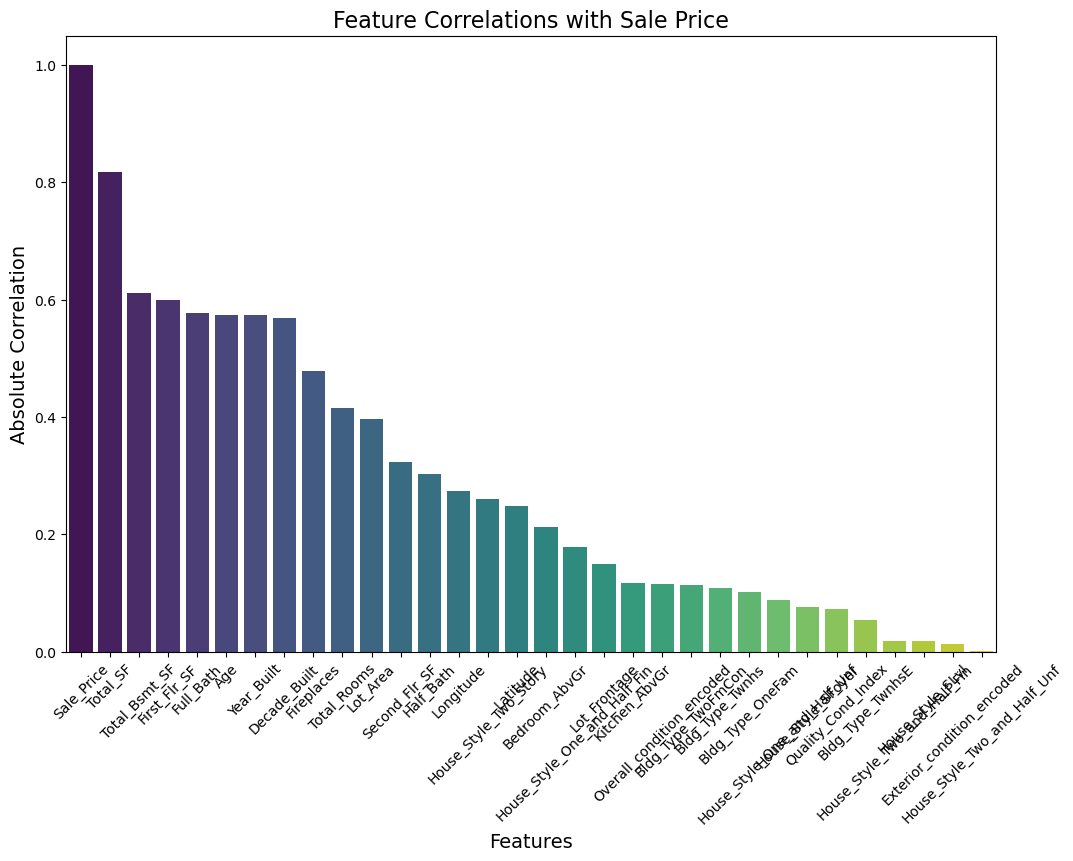

In [79]:
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')

# Add titles and labels
plt.title('Feature Correlations with Sale Price', fontsize=16)
plt.ylabel('Absolute Correlation', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tick_params(axis='x', rotation=45)

# Display the plot
plt.show()

From the result barplot above we can see that the engineered feature Total sqaure feet has high correlation with the sales price and this correlationuld be because it tell us the total spcae in the house.

conclusively, it is good to see the some of the engineered features having a good correlation with the target varible which shows that critically and calculatively engineering new features can help our model perform better.

### Normalization of data:

Normalization is a data preprocessing technique used to adjust the scale of features or variables in a dataset so that they have a common scale, typically within a specific range, such as 0 to 1. The main goal of normalization is to ensure that different features contribute equally to a model, especially when the features have varying units or scales.

__While normalization is a good practice, I will only normalise the features that are widely spread and are measurements meaning they are continous data. I will not be normalizing the count data because normalization can distort the interpretability of the data. Count data represents the frequency of occurrences, and these raw counts often have meaningful and interpretable absolute values. Normalizing this data can obscure the natural scale and relationships between counts, making it harder to understand the magnitude of differences between observations.__

In [80]:
housing_df_copy = housing_df.copy()

In [81]:
housing_df.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF',
       'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude',
       'Sale_Price', 'Bldg_Type_OneFam', 'Bldg_Type_Twnhs', 'Bldg_Type_TwnhsE',
       'Bldg_Type_TwoFmCon', 'House_Style_One_and_Half_Fin',
       'House_Style_One_and_Half_Unf', 'House_Style_SFoyer',
       'House_Style_SLvl', 'House_Style_Two_Story',
       'House_Style_Two_and_Half_Fin', 'House_Style_Two_and_Half_Unf',
       'Overall_condition_encoded', 'Exterior_condition_encoded', 'Age',
       'Decade_Built', 'Construction_Age', 'Total_SF', 'Total_Rooms',
       'Quality_Cond_Index'],
      dtype='object')

In [82]:
scaler = MinMaxScaler()

# List of numerical columns to normalize
numerical_features = ['Lot_Frontage', 'Lot_Area', 'Total_Bsmt_SF', 'First_Flr_SF',
       'Second_Flr_SF', 'Total_SF']

# Apply Min-Max scaling
housing_df[numerical_features] = scaler.fit_transform(housing_df[numerical_features])

print(housing_df[numerical_features].head())

   Lot_Frontage  Lot_Area  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0      0.536913  0.596647       0.427740      0.308114       0.000000   
1      0.543624  0.749538       0.644520      0.545504       0.000000   
2      0.496644  0.724277       0.450048      0.325658       0.385589   
3      0.523490  0.501618       0.449079      0.324561       0.372937   
4      0.275168  0.209249       0.648885      0.550439       0.000000   

   Total_SF  
0  0.292485  
1  0.470731  
2  0.450273  
3  0.444805  
4  0.474377  


In [83]:
housing_df.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0      0.536913  0.596647        1961       0.427740      0.308114   
1      0.543624  0.749538        1958       0.644520      0.545504   
2      0.496644  0.724277        1997       0.450048      0.325658   
3      0.523490  0.501618        1998       0.449079      0.324561   
4      0.275168  0.209249        2001       0.648885      0.550439   

   Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0       0.000000          1          0              2              1   
1       0.000000          1          1              3              1   
2       0.385589          2          1              3              1   
3       0.372937          2          1              3              1   
4       0.000000          2          0              2              1   

   Fireplaces  Longitude   Latitude  Sale_Price  Bldg_Type_OneFam  \
0           0 -93.619756  42.053014      105000               1.0   
1           0 -93.619387  42.052659      172000               1.0   
2           1 -93.638933  42.060899      189900               1.0   
3           1 -93.638925  42.060779      195500               1.0   
4           0 -93.633792  42.062978      213500               0.0   

   Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
0              0.0               0.0                 0.0   
1              0.0               0.0                 0.0   
2              0.0               0.0                 0.0   
3              0.0               0.0                 0.0   
4              0.0               1.0                 0.0   

   House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    1.0   
3                 0.0               0.0                    1.0   
4                 0.0               0.0                    0.0   

   House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   Overall_condition_encoded  Exterior_condition_encoded  Age  Decade_Built  \
0                        5.0                         2.0   63          1960   
1                        5.0                         2.0   66          1950   
2                        4.0                         2.0   27          1990   
3                        5.0                         2.0   26          1990   
4                        4.0                         2.0   23          2000   

  Construction_Age  Total_SF  Total_Rooms  Quality_Cond_Index  
0                2  0.292485          4.0                10.0  
1                2  0.470731          5.5                10.0  
2                3  0.450273          6.5                 8.0  
3                3  0.444805          6.5                10.0  
4                3  0.474377          5.0                 8.0

In [84]:
#confirm that there is no mising values before we split our data
housing_df.isna().sum()

Lot_Frontage                    0
Lot_Area                        0
Year_Built                      0
Total_Bsmt_SF                   0
First_Flr_SF                    0
Second_Flr_SF                   0
Full_Bath                       0
Half_Bath                       0
Bedroom_AbvGr                   0
Kitchen_AbvGr                   0
Fireplaces                      0
Longitude                       0
Latitude                        0
Sale_Price                      0
Bldg_Type_OneFam                0
Bldg_Type_Twnhs                 0
Bldg_Type_TwnhsE                0
Bldg_Type_TwoFmCon              0
House_Style_One_and_Half_Fin    0
House_Style_One_and_Half_Unf    0
House_Style_SFoyer              0
House_Style_SLvl                0
House_Style_Two_Story           0
House_Style_Two_and_Half_Fin    0
House_Style_Two_and_Half_Unf    0
Overall_condition_encoded       0
Exterior_condition_encoded      0
Age                             0
Decade_Built                    0
Construction_A

### Feature Selection

### Hypothesis: Selecting Features for training our models help avoid overfitting and helps the model perform better.

__I will be using some of the features to train to avoid overfitting and confusion of our model. The numerical features will be chosen based on the correlation they have with the target variable using a threshold of 0.25 while the categorical feature (Building type, overall condition and house style) are chosen as they will typically contribute to a house sales price and could be attributed to be an important feature that can determine the price of a house.__

In [85]:
# Drop the exterior condition column as we will not be using ths in our analysis
housing_df.drop(['Exterior_condition_encoded', 'Longitude','Latitude', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 
                 'Construction_Age'], axis=1, inplace=True)

housing_df.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0      0.536913  0.596647        1961       0.427740      0.308114   
1      0.543624  0.749538        1958       0.644520      0.545504   
2      0.496644  0.724277        1997       0.450048      0.325658   
3      0.523490  0.501618        1998       0.449079      0.324561   
4      0.275168  0.209249        2001       0.648885      0.550439   

   Second_Flr_SF  Full_Bath  Half_Bath  Fireplaces  Sale_Price  \
0       0.000000          1          0           0      105000   
1       0.000000          1          1           0      172000   
2       0.385589          2          1           1      189900   
3       0.372937          2          1           1      195500   
4       0.000000          2          0           0      213500   

   Bldg_Type_OneFam  Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
0               1.0              0.0               0.0                 0.0   
1               1.0              0.0               0.0                 0.0   
2               1.0              0.0               0.0                 0.0   
3               1.0              0.0               0.0                 0.0   
4               0.0              0.0               1.0                 0.0   

   House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
0                 0.0               0.0                    0.0   
1                 0.0               0.0                    0.0   
2                 0.0               0.0                    1.0   
3                 0.0               0.0                    1.0   
4                 0.0               0.0                    0.0   

   House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   Overall_condition_encoded  Age  Decade_Built  Total_SF  Total_Rooms  \
0                        5.0   63          1960  0.292485          4.0   
1                        5.0   66          1950  0.470731          5.5   
2                        4.0   27          1990  0.450273          6.5   
3                        5.0   26          1990  0.444805          6.5   
4                        4.0   23          2000  0.474377          5.0   

   Quality_Cond_Index  
0                10.0  
1                10.0  
2                 8.0  
3                10.0  
4                 8.0

In [86]:
housing_df.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF',
       'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath', 'Fireplaces',
       'Sale_Price', 'Bldg_Type_OneFam', 'Bldg_Type_Twnhs', 'Bldg_Type_TwnhsE',
       'Bldg_Type_TwoFmCon', 'House_Style_One_and_Half_Fin',
       'House_Style_One_and_Half_Unf', 'House_Style_SFoyer',
       'House_Style_SLvl', 'House_Style_Two_Story',
       'House_Style_Two_and_Half_Fin', 'House_Style_Two_and_Half_Unf',
       'Overall_condition_encoded', 'Age', 'Decade_Built', 'Total_SF',
       'Total_Rooms', 'Quality_Cond_Index'],
      dtype='object')

### __SPLIT THE DATASET INTO TRAINING TEST DATASET__

Machine learning relies on data partitioning into training and testing sets. This divide allows the model to be trained on a certain subset of data, then tested on a new subset. This assesses your model's generalizability to new, unseen data.

- train_test_split is a function from the sklearn.model_selection module in scikit-learn.
- X represents your feature matrix (input data), and y represents your target variable (output labels).
- test_size specifies the proportion of the data that should be used for testing
- random_state is a seed value used to ensure reproducibility. Setting it to a specific value ensures that the data split is the same every time you run the code.

In [87]:
# Set the random seed for reproducibility
random_seed = 42

#import the train_test_split module for the splitting of data
from sklearn.model_selection import train_test_split

# Splitting of data into feature and targer attributes
X = housing_df.drop(['Sale_Price'], axis = 1) 
y = housing_df['Sale_Price']

#spliting of data into 80:20 Ratio with random seed of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_seed)

- X_train: Features for training.
- X_test: Features for testing.
- y_train: Target values corresponding to the training features.
- y_test: Target values corresponding to the testing features.

In [88]:
X_train.head()

Lot_Frontage  Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
210      0.429530  0.350289        2010       0.592629      0.486842   
923      0.523490  0.514798        2007       0.758002      0.673794   
942      0.436242  0.394509        1994       0.682832      0.737390   
678      0.436242  0.550058        2008       0.834142      0.759868   
299      0.496644  0.511040        1998       0.403492      0.302083   

     Second_Flr_SF  Full_Bath  Half_Bath  Fireplaces  Bldg_Type_OneFam  \
210       0.000000          2          0           0               1.0   
923       0.000000          2          0           1               1.0   
942       0.000000          2          0           1               1.0   
678       0.000000          2          0           1               1.0   
299       0.458196          2          1           1               1.0   

     Bldg_Type_Twnhs  Bldg_Type_TwnhsE  Bldg_Type_TwoFmCon  \
210              0.0               0.0                 0.0   
923              0.0               0.0                 0.0   
942              0.0               0.0                 0.0   
678              0.0               0.0                 0.0   
299              0.0               0.0                 0.0   

     House_Style_One_and_Half_Fin  House_Style_One_and_Half_Unf  \
210                           0.0                           0.0   
923                           0.0                           0.0   
942                           0.0                           0.0   
678                           0.0                           0.0   
299                           0.0                           0.0   

     House_Style_SFoyer  House_Style_SLvl  House_Style_Two_Story  \
210                 0.0               0.0                    0.0   
923                 0.0               0.0                    0.0   
942                 0.0               0.0                    0.0   
678                 0.0               0.0                    0.0   
299                 0.0               0.0                    1.0   

     House_Style_Two_and_Half_Fin  House_Style_Two_and_Half_Unf  \
210                           0.0                           0.0   
923                           0.0                           0.0   
942                           0.0                           0.0   
678                           0.0                           0.0   
299                           0.0                           0.0   

     Overall_condition_encoded  Age  Decade_Built  Total_SF  Total_Rooms  \
210                        4.0   14          2010  0.427385          5.0   
923                        4.0   17          2000  0.565526          6.0   
942                        4.0   30          1990  0.557626          6.0   
678                        4.0   16          2000  0.629127          6.0   
299                        4.0   26          1990  0.448856          6.5   

     Quality_Cond_Index  
210                 8.0  
923                 8.0  
942                 8.0  
678                 8.0  
299                 8.0

The dataset has been split into training and test datasets. I will train the model with the train set and then test with the test set and then do an evealuation to know which model performs better.

__Model Evaluation__

- Model evaluation is the process of determining a trained machine learning model's effectiveness and quality using a variety of measures. The objective is to comprehend how effectively the model works with fresh, untested data.

The performance of the models will be determined using the following:

1.__Mean Squared Error (MSE):__

Definition: The Mean Squared Error (MSE) is a measure of the average squared difference between the actual values and the predicted values in a dataset. It quantifies the error by taking the square of the differences between predicted and actual values, then averaging these squared differences.

Interpretation:

MSE gives a sense of the overall error in a model's predictions.
Since the errors are squared, larger errors are penalized more than smaller ones, making MSE sensitive to outliers.
A lower MSE indicates better model performance.
Example: If a model's predictions are close to the actual values, the MSE will be small, indicating high accuracy.

__2. Root Mean Square Error (RMSE):__

Definition: The Root Mean Square Error (RMSE) is the square root of the Mean Squared Error. It provides an error metric on the same scale as the original data, making it easier to interpret compared to MSE, which is in squared units.

Interpretation:

RMSE retains the properties of MSE, including sensitivity to outliers, but by taking the square root, it brings the error metric back to the original scale of the target variable.
Like MSE, a lower RMSE indicates a better fit of the model to the data.
Example: If you're predicting house prices, and the RMSE is 10,000, this means the model's predictions are, on average, off by 10,000 dollars from the actual prices.

__3. Mean Absolute Error (MAE)__

Definition: The Mean Absolute Error (MAE) measures the average magnitude of errors in a set of predictions, without considering their direction. It calculates the average absolute difference between actual values and predicted values.

Interpretation:

MAE provides a straightforward measure of prediction accuracy by averaging the absolute errors between predictions and actual values.
Unlike MSE and RMSE, MAE does not square the errors, so it treats all errors linearly and is less sensitive to outliers.
A lower MAE indicates better model performance.
Example: If a model's MAE is 5, this means that, on average, the model's predictions are off by 5 units from the actual values.

__4. R-Squared:__

Definition: R-Squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It essentially indicates how well the independent variables explain the variability of the dependent variable.

Interpretation:

R squared ranges from 0 to 1
- An r2 of 1 indicates that the model perfectly explains the variance in the target variable.
- An r2 of 0 indicates that the model explains none of the variance.

Higher r2 values indicate better model performance, as more of the variance in the target variable is explained by the model.
Example: If an r2 value is 0.8, this means that 80% of the variance in the dependent variable is explained by the independent variables in the model.

### Model Selection
The process of "model selection" entails selecting the machine learning method or model that best addresses a certain issue. It's an important step since choosing the proper model can have a big impact on how well your predictive or analytical work performs. Each model have various strengths and shortcomings hence the will be using multiple models and select the best one after evaluation their performance

When building machine learning models for predicting housing prices or other related tasks using housing data, the choice of models depends on various factors, such as the size of the dataset, the complexity of the features, and the specific requirements of the problem (e.g., interpretability vs. accuracy). 

The models that will be used are 
- Linear Regression
- Lasso and Ridge regression
- Gradient Boosting Machines (GBM)
- Random Forest

__Linear regression__ is a simple and widely used model for predicting a continuous target variable. It assumes a linear relationship between the target variable and one or more independent variables (features). 

Use Cases: Predicting housing prices, sales forecasts, and other scenarios where relationships are linear.

Pros: Easy to interpret, simple to implement, and works well when there is a linear relationship between the features and the target.

Cons: Limited to linear relationships, sensitive to outliers, and prone to underfitting if the relationship is complex.

__Lasso (Least Absolute Shrinkage and Selection Operator) and Ridge regression__ are extensions of linear regression that add regularization terms to the loss function to prevent overfitting.

Lasso Regression adds a penalty equal to the absolute value of the coefficients, encouraging some coefficients to be exactly zero, thus performing feature selection.

Ridge Regression adds a penalty equal to the square of the coefficients, which shrinks the coefficients but doesn’t set them to zero.

Use Cases: When dealing with high-dimensional data or when feature selection is needed.

Pros: Helps prevent overfitting, especially in high-dimensional data, and Lasso can perform feature selection.

Cons: May be difficult to interpret when there are many features, and the choice of regularization parameter can be challenging.

__Gradient Boosting Machines (GBM)__ is an ensemble learning technique that builds multiple decision trees sequentially. 

Use Cases: Complex regression and classification tasks, such as predicting customer churn, fraud detection, and ranking problems.

Pros: Highly accurate, can capture complex patterns, and less prone to overfitting than individual decision trees.

Cons: Computationally intensive, sensitive to hyperparameters, and can be difficult to interpret.

__Random Forest__ is an ensemble learning method that builds multiple decision trees independently using different subsets of the data and features. The final prediction is typically the average (for regression) or the majority vote (for classification) of all the trees.

Use Cases: Classification and regression tasks, especially when there are many features and complex relationships, such as in finance, healthcare, and marketing.

Pros: Reduces the risk of overfitting compared to a single decision tree, handles large datasets well, and can handle missing data.

Cons: Can be less interpretable than individual decision trees, and the model can be computationally expensive to train.

__These models are chosen since they can all be used for regression and predicting house prices very well.__

__Train the Linear Regression Model Giving your machine learning model training data will enable it to recognize patterns and connections in the data. The model may now make predictions on fresh, unforeseen data after being trained. Also evaluate the model's performance__

In [89]:
#Simple Linear Regression Model initialization 
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

#model prediction
y_pred_linear = linear_model.predict(X_test)

# Calculate Mean Squared Error
linear_mse = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error_linear: {linear_mse}")

# Calculate Mean Absolute Error
linear_mae = mean_absolute_error(y_test, y_pred_linear)
print(f'Mean Absolute Error_linear: {linear_mae}')

# Calculate Root Mean Squared Error
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'Root Mean Squared Error_linear: {linear_rmse}')
      
# Calculate R-squared value
linear_r2 = r2_score(y_test, y_pred_linear)
print(f"R-squared_linear: {linear_r2}")


Mean Squared Error_linear: 591245096.2714763
Mean Absolute Error_linear: 17774.781985724723
Root Mean Squared Error_linear: 24315.531996472466
R-squared_linear: 0.8531409633471281


### Using Lasso and Ridge regression model

__Train the Lasso Regression Model and evaluate the performance__


In [90]:
# Initialize the Lasso Regression model
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength

# Train the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# print the result
print(f"Mean Squared Error_lasso: {mse_lasso}")
print(f"R-squared_lasso: {r2_lasso}")
print(f'Mean Absolute Error_lasso: {mae_lasso}')
print(f'Root Mean Squared Error_lasso: {rmse_lasso}')

Mean Squared Error_lasso: 591088682.3742158
R-squared_lasso: 0.8531798149070238
Mean Absolute Error_lasso: 17771.253779034683
Root Mean Squared Error_lasso: 24312.315446584184


__Train the Ridge Regression Model and evealuate its performance__


In [91]:
# Initialize the Ridge Regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength

# Train the model on the training data
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# print the results
print(f"Mean Squared Error_ridge: {mse_ridge}")
print(f"R-squared_ridge: {r2_ridge}")
print(f'Mean Absolute Error_ridge: {mae_ridge}')
print(f'Root Mean Squared Error_ridge: {rmse_ridge}')

Mean Squared Error_ridge: 583976425.955476
R-squared_ridge: 0.8549464242754078
Mean Absolute Error_ridge: 17652.466590472766
Root Mean Squared Error_ridge: 24165.604191815193


In [92]:
# You can compare the performance of both models to see which one works better for your data.
print("Comparison of Lasso and Ridge Regression:")
print(f"Lasso Regression MSE: {mse_lasso}, R-squared: {r2_lasso}, MAE: {mae_lasso}, RMSE: {rmse_lasso}")
print(f"Ridge Regression MSE: {mse_ridge}, R-squared: {r2_ridge}, MAE: {mae_ridge}, RMSE: {rmse_ridge}")

Comparison of Lasso and Ridge Regression:
Lasso Regression MSE: 591088682.3742158, R-squared: 0.8531798149070238, MAE: 17771.253779034683, RMSE: 24312.315446584184
Ridge Regression MSE: 583976425.955476, R-squared: 0.8549464242754078, MAE: 17652.466590472766, RMSE: 24165.604191815193


## Using Gradient Boosting Machines (GBM)

In [93]:
# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Calculate Mean Squared Error
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f"Mean Squared Error_gbm: {mse_gbm}")

# Calculate Mean Absolute Error
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
print(f'Mean Absolute Error_gbm: {mae_gbm}')

# Calculate Root Mean Squared Error
rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
print(f'Root Mean Squared Error_gbm: {rmse_gbm}')

# Calculate R-squared value
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"R-squared_gbm: {r2_gbm}")

Mean Squared Error_gbm: 395710371.0640419
Mean Absolute Error_gbm: 14674.833029053794
Root Mean Squared Error_gbm: 19892.470210208732
R-squared_gbm: 0.9017097236755226


## Using Random Forest model

In [94]:
# Initialize the Random Forest Regressor
randomforest = RandomForestRegressor(random_state=42)

# Train the model on the training data
randomforest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = randomforest.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error_rf: {mse_rf}")

# Calculate Mean Absolute Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error_rf: {mae_rf}')

# Calculate Root Mean Squared Error
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Root Mean Squared Error_rf: {rmse_rf}')

# Calculate R-squared value
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared_rf: {r2_rf}")

Mean Squared Error_rf: 421145841.28444064
Mean Absolute Error_rf: 14759.864888716356
Root Mean Squared Error_rf: 20521.838155595142
R-squared_rf: 0.8953918215450237


## Task 4.4: Perform hyperparameter tuning to optimize the model's performance.

Hyperparameter tuning is crucial for optimizing model performance by finding the best values for parameters that control the model's behavior, such as regularization strength in Lasso and Ridge regression. Proper tuning helps balance the trade-off between bias and variance, preventing overfitting or underfitting and ensuring the model generalizes well to unseen data. It also enhances model interpretability by identifying the most relevant features and ensuring that the model is neither too simple nor too complex.

__Ridge and Lasso Hyperparameter tuning__

Hyperparameter tuning in Lasso and Ridge regression is crucial for optimizing model performance by finding the best values for the regularization parameters, which control the trade-off between fitting the model well and keeping it simple.

In [95]:
# Lasso Regression - Hyperparameter Tuning
lasso_cv = GridSearchCV(Lasso(), {'alpha': [0.1, 1.0, 10.0, 100.0]}, cv=5)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_

# Ridge Regression - Hyperparameter Tuning
ridge_cv = GridSearchCV(Ridge(), {'alpha': [0.1, 1.0, 10.0, 100.0]}, cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_

print(f"Best Lasso alpha: {lasso_cv.best_params_}")
print(f"Best Ridge alpha: {ridge_cv.best_params_}")

Best Lasso alpha: {'alpha': 10.0}
Best Ridge alpha: {'alpha': 1.0}


In [96]:
# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters
best_alpha_ridge = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha_ridge}")

# Train the model with the best alpha
ridge_best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_ridge = ridge_best_model.predict(X_test)

# Evaluate the model with the best parameters
rmse_best_ridge = np.sqrt(mean_squared_error(y_test, y_pred_best_ridge))
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
mae_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f"Best Root Mean Squared Error for Ridge: {rmse_best_ridge}")
print(f"Best Mean Squared Error for Ridge: {mse_best_ridge}")
print(f"Best Mean Absolute Error for Ridge: {mae_best_ridge}")
print(f"Best R-squared for Ridge: {r2_best_ridge}")

Best alpha: 0.1
Best Root Mean Squared Error for Ridge: 24296.942787023672
Best Mean Squared Error for Ridge: 590341428.7959017
Best Mean Absolute Error for Ridge: 17759.92735498508
Best R-squared for Ridge: 0.8533654248027145


In [97]:
# Define the model
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters
best_alpha_lasso = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha_lasso}")

# Train the model with the best alpha
best_model_lasso = grid_search.best_estimator_

# Predict on the test set
y_pred_best_lasso = best_model_lasso.predict(X_test)

# Evaluate the model with the best parameters
rmse_best_lasso = np.sqrt(mean_squared_error(y_test, y_pred_best_lasso))
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

print(f"Best Root Mean Squared Error for Lasso: {rmse_best_lasso}")
print(f"Best Mean Squared Error for Lasso: {mse_best_lasso}")
print(f"Best Mean Absolute Error for Lasso: {mae_best_lasso}")
print(f"Best R-squared for Lasso: {r2_best_lasso}")

Best alpha: 10
Best Root Mean Squared Error for Lasso: 24285.63258113498
Best Mean Squared Error for Lasso: 589791949.8658849
Best Mean Absolute Error for Lasso: 17755.352598799713
Best R-squared for Lasso: 0.8535019095648414


__Gradient Boost Model Hyperparameter tuning__

In [102]:
# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Explanation of the GridSearchCV Variables
# n_estimators: Number of boosting stages. More stages generally mean better performance up to a point. 
#                 More trees can improve accuracy but increase computation time.
# learning_rate: Reduces the impact of each individual tree. Smaller rates improve generalization.
# max_depth: Depth of each tree. Deeper trees can model more complex relationships but may overfit.
# min_samples_split: Minimum samples needed to split an internal node. Higher values help prevent overfitting.
# min_samples_leaf: Minimum samples required at a leaf node. Larger values make the model more robust to noise.
# subsample: Fraction of samples used for fitting individual trees. Helps in reducing overfitting.
# max_features: Number of features to consider when splitting. Smaller values reduce overfitting risk.


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params_gbm = grid_search.best_params_
print(f"Best parameters: {best_params_gbm}")

# Train the model with the best parameters
best_model_gbm = grid_search.best_estimator_

# Predict on the test set
y_pred_best_gbm = best_model_gbm.predict(X_test)

# Evaluate the model with the best parameters
rmse_best_gbm = np.sqrt(mean_squared_error(y_test, y_pred_best_gbm))
mse_best_gbm = mean_squared_error(y_test, y_pred_best_gbm)
mae_best_gbm = mean_absolute_error(y_test, y_pred_best_gbm)
r2_best_gbm = r2_score(y_test, y_pred_best_gbm)

print(f"Best Root Mean Squared Error for GBM: {rmse_best_gbm}")
print(f"Best Mean Squared Error for GBM: {mse_best_gbm}")
print(f"Best Mean Absolute Error for GBM: {mae_best_gbm}")
print(f"Best R-squared for GBM: {r2_best_gbm}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000, 'subsample': 0.7}
Best Root Mean Squared Error for GBM: 19458.1355288252
Best Mean Squared Error for GBM: 378619038.25812966
Best Mean Absolute Error for GBM: 13807.43117085532
Best R-squared for GBM: 0.9059550302105258


__Random Forest Hyperparameter tuning__

In [101]:
# Initialize the Random Forest Regressor
randomforest_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# n_estimators: Controls the number of trees in the forest. 
# max_depth: Limits the depth of each tree. Shallower trees are less likely to overfit.
# min_samples_split: Ensures that nodes are only split if they contain a minimum number of samples. 
#                         Higher values can reduce overfitting.
# min_samples_leaf: Specifies the minimum number of samples that a leaf node must have. 
#                     Larger values make the model more robust to noise.
# max_features: Reduces the number of features considered at each split, helping to reduce variance.
# bootstrap: Determines whether to use bootstrap samples. Bootstrapping generally adds randomness, making the model more robust.

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=randomforest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_model_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_model_rf.predict(X_test)

# Evaluate the model with the best parameters
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Root Mean Squared Error for RF: {rmse_best_rf}")
print(f"Best Mean Squared Error for RF: {mse_best_rf}")
print(f"Best Mean Absolute Error for RF: {mae_best_rf}")
print(f"Best R-squared for RF: {r2_best_rf}")

Best parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Root Mean Squared Error for RF: 20780.511382373992
Best Mean Squared Error for RF: 431829653.3129751
Best Mean Absolute Error for RF: 14366.213213043478
Best R-squared for RF: 0.8927380754891401


In [117]:
#create a function to evaluate the model and return the mse, rmse, mae and r2
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, mse, r2

# evaluate the best optimized models
results = {'Ridge Regression': evaluate_model(ridge_best_model, X_test, y_test),
           'Lasso Regression': evaluate_model(best_model_lasso, X_test, y_test),
           'Random Forest': evaluate_model(best_model_rf, X_test, y_test),
           'Gradient Boosting': evaluate_model(best_model_gbm, X_test, y_test)}

# find the best model based on RMSE and R² using the lambda function
best_model_name = min(results, key=lambda x: (results[x][0], -results[x][2]))
best_model_metrics = results[best_model_name]

# print the best performing model and the model metrics
print(f'The best-performing model is {best_model_name} with the following metrics:')
print(f"RMSE: {best_model_metrics[0]}, MAE: {best_model_metrics[1]}, MSE: {best_model_metrics[2]} R²: {best_model_metrics[3]}")

The best-performing model is Gradient Boosting with the following metrics:
RMSE: 19243.814921014597, MAE: 13773.052600720355, MSE: 370324412.71426404 R²: 0.908015327580348


__The best performing model is the Gradient boosting model and this is clearly indicated by the R-sqaured. The closer the R-squrared to 1 the better the performance of the model. Since the R2 of the GBM model is 0.908 closest to 1 than the other model, we say that GBM is the best model for this prediction.__

__Also it has the lowest Root mean square of 19243.8 and the lower the RMSE, the better the model.__

### Comparing the model's performance before and after hyperparameter tuning using the R2 and RMSE.

R2 and RMSE is chosen because R2 is most easy to understand and interprete as it ranges between 0 and 1 and percentage can be calculated for it and RMSE shows on average how much the price is off the actual price.

This will help check if there is a difference in performance and also help view the effect of hyperparameter tuning.

__Note: a lower rmse shows a better performance and a higher r2 show a better performance.__

In [104]:
#Ridge and lasso
print(f'Before hyperparameter tuning for Lasso - RMSE: {rmse_lasso}, R2: {r2_lasso}')
print(f'After hyperparameter tuning for Lasso - RMSE: {rmse_best_lasso}, R2: {r2_best_lasso}')
print('\n')
print(f'Before hyperparameter tuning for Ridge - RMSE: {rmse_ridge}, R2: {r2_ridge}')
print(f'After hyperparameter tuning for Ridge - RMSE: {rmse_best_ridge}, R2: {r2_best_ridge}')

Before hyperparameter tuning for Lasso - RMSE: 24312.315446584184, R2: 0.8531798149070238
After hyperparameter tuning for Lasso - RMSE: 24285.63258113498, R2: 0.8535019095648414


Before hyperparameter tuning for Ridge - RMSE: 24165.604191815193, R2: 0.8549464242754078
After hyperparameter tuning for Ridge - RMSE: 24296.942787023672, R2: 0.8533654248027145


For Lasso we can see from the metrics that the model performed better after hyperparameter tuning whie the ridge the model performed poorer.

Reasons for this could be that Lasso can benefit more from hyperparameter tuning when irrelevant features are present because it can effectively zero out unnecessary coefficients. On the other hand, Ridge may perform worse if the regularization is too strong, leading to an overly simplistic model.

In [105]:
# for Gradient boosting model
print(f'Before hyperparameter tuning for GBM - RMSE: {rmse_gbm}, R2: {r2_gbm}')
print(f'After hyperparameter tuning for GBM - RMSE: {rmse_best_gbm}, R2: {r2_best_gbm}')

Before hyperparameter tuning for GBM - RMSE: 19892.470210208732, R2: 0.9017097236755226
After hyperparameter tuning for GBM - RMSE: 19458.1355288252, R2: 0.9059550302105258


__The hyperparameter tuning for Gradient boosting regressor model helped the model to perform better. From the comparison, it is seen that the R-squared increased and the root mean squared error reduced.__

In [103]:
# for random forest
print(f'Before hyperparameter tuning for Random forest - RMSE: {rmse_rf}, R2: {r2_rf}')
print(f'After hyperparameter tuning for Random Forest - RMSE: {rmse_best_rf}, R2: {r2_best_rf}')

Before hyperparameter tuning for Random forest - RMSE: 20521.838155595142, R2: 0.8953918215450237
After hyperparameter tuning for Random Forest - RMSE: 20780.511382373992, R2: 0.8927380754891401


__The hyperparameter tuning for Random Forest regressor model helped the model to perform better. From the comparison, it is seen that the R-squared increased and the root mean squared error reduced.__

In [106]:
best_model = best_model_gbm

In [107]:
#extract feature importances
importantfeatures = best_model.feature_importances_

#retrieve the feature names from the training data, X_train contains the training features
features = X_train.columns

#create a dataframe to pair each feature with its importance score
importantfeature_house = pd.DataFrame({'Feature': features, 'Importance': importantfeatures})

#sort the dataframe by the importance column in descending order
importantfeatures_house = importantfeature_house.sort_values(by='Importance', ascending=False)

#print the dataframe
print(importantfeatures_house)

                         Feature  Importance
23                      Total_SF    0.234721
2                     Year_Built    0.135400
21                           Age    0.093935
3                  Total_Bsmt_SF    0.081550
22                  Decade_Built    0.075614
4                   First_Flr_SF    0.072837
8                     Fireplaces    0.060715
5                  Second_Flr_SF    0.055393
1                       Lot_Area    0.040208
6                      Full_Bath    0.029587
0                   Lot_Frontage    0.029506
24                   Total_Rooms    0.026419
20     Overall_condition_encoded    0.018418
25            Quality_Cond_Index    0.017049
7                      Half_Bath    0.011961
17         House_Style_Two_Story    0.006535
9               Bldg_Type_OneFam    0.004525
13  House_Style_One_and_Half_Fin    0.001495
11              Bldg_Type_TwnhsE    0.001382
16              House_Style_SLvl    0.001177
10               Bldg_Type_Twnhs    0.000485
15        

### Visualization of the feature importance of the best model

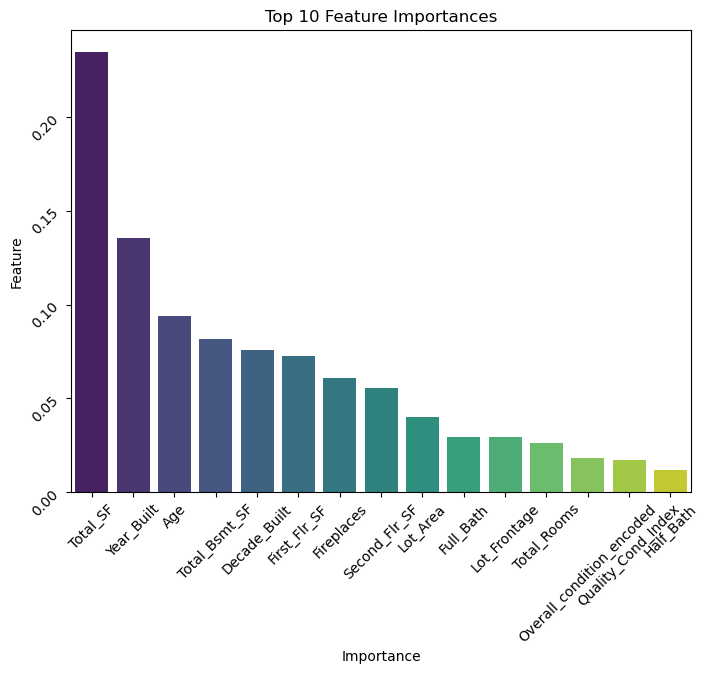

In [108]:
top_15_features = importantfeatures_house.head(15)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Importance', data=top_15_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.tick_params(rotation = 45)
plt.show()

__One interesting finding to note is that the first 15 features that are very important to the prediction by the model are same with the first 15 features with better correlation to the target variable.__ 

### Critical Feature Importance

__Total Square Feet (Total SF):__

Impact: Total SF, which typically combines the area of all floors, is usually one of the most critical factors in determining house prices. A larger total square footage often directly correlates with higher prices, as it indicates more living space, which is highly valued by buyers.

Interpretation: The model likely assigns a high importance to Total SF, meaning that houses with larger areas are predicted to have higher sale prices.

__Decade Built:__

Impact: The decade in which a house was built can reflect the architectural style, construction quality, and historical significance. Older homes might be priced lower unless they have been well-maintained or are located in historically significant areas.
Interpretation: The model might use the Decade Built to adjust for the era's typical construction quality and market preferences. Houses built in certain decades may show higher or lower predicted prices depending on these factors.

__Age:__

Impact: Age reflects how long the house has been standing since its construction. Older houses might require more maintenance or have outdated features, which can reduce their market value. Conversely, historic homes or well-maintained older houses might still fetch high prices.
Interpretation: The model likely uses Age to adjust prices downward for older homes, unless other features (like renovations) compensate for the age.

__Total Basement SF:__

Impact: The total basement square footage can significantly influence house prices, especially in markets where basements are valued for additional living space or storage. A larger basement area often adds to the overall utility and appeal of the house.
Interpretation: The model probably assigns a substantial positive weight to Total Basement SF, indicating that homes with larger basements are predicted to have higher sale prices.

__Year Built:__

Impact: The year a house was built gives a more specific indication of its age and the era of its construction, affecting the style, materials used, and initial construction quality. Houses built more recently might be priced higher due to modern amenities and construction standards.
Interpretation: The model uses Year Built to fine-tune the price prediction, with newer houses generally predicted to have higher prices, all else being equal.

### Insights and Implications

__Model Insights:__ The importance assigned to these features by the model reflects their direct influence on house prices. Total SF and Total Basement SF typically have the most significant impact, indicating that overall size and living space are primary drivers of value.

__Business Implications:__ Understanding the importance of these features can guide real estate developers, sellers, and buyers. For example, increasing living space or modernizing an older home could significantly enhance its market value. Similarly, highlighting the historical value of a house based on its Decade Built could attract specific buyer segments.

### Lasso and Ridge model result visualization

Visualizing the coefficients can help you understand the impact of each feature in the model.

In [109]:
best_lasso.coef_

array([ 1.06087606e+04,  2.97101308e+04,  1.14139370e+03,  4.73302948e+04,
        1.39271532e+05,  1.35935279e+05,  1.70022679e+04,  6.04893674e+03,
        5.52136685e+03,  1.69433223e+04,  6.88350315e+03,  1.39230840e+04,
        1.77773681e+04,  0.00000000e+00,  1.00126574e+04,  2.97636419e+03,
       -6.39396473e+02, -1.15044745e+03, -4.89401744e+03,  4.72565338e+03,
        7.93044922e+03,  3.90119664e+02,  6.62108432e+01,  6.71007438e+04,
       -1.46496572e+04,  2.39102895e+02])

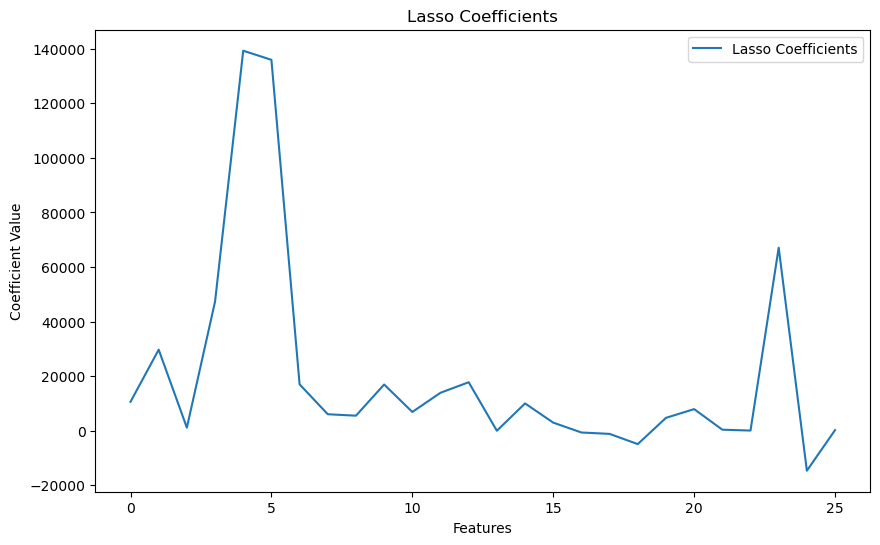

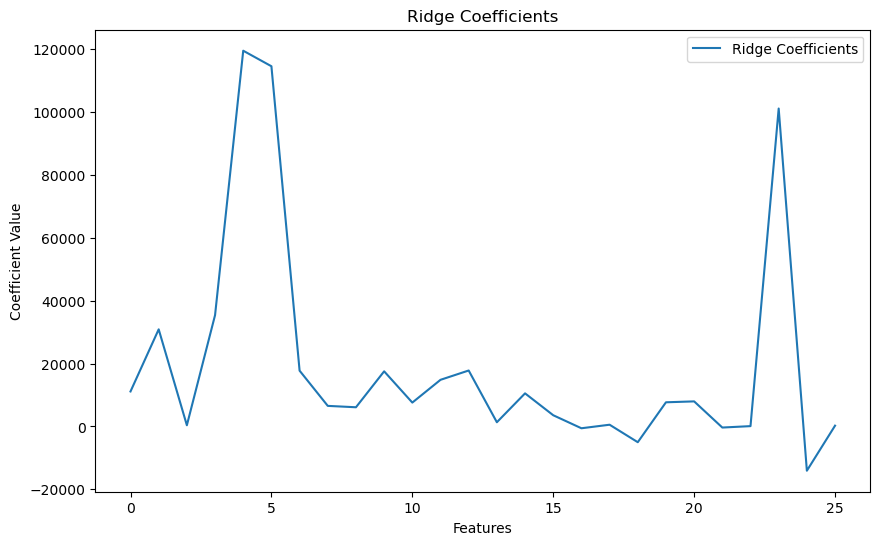

In [110]:
# Lasso Coefficients
plt.figure(figsize=(10, 6))
plt.plot(best_lasso.coef_, label='Lasso Coefficients')
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Ridge Coefficients
plt.figure(figsize=(10, 6))
plt.plot(best_ridge.coef_, label='Ridge Coefficients')
plt.title('Ridge Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


#### INSIGHT:

From the above, we see that the feature havng 5 has highest coefficient meaning it has the highest the it has high importance to both Ride and lasso models.

### Gradient Boosting Model(GBM) model result visualization

#### Visualize Feature Importance in GBM model
GBM models provide feature importance scores, which indicate how much each feature contributes to the model's predictions.


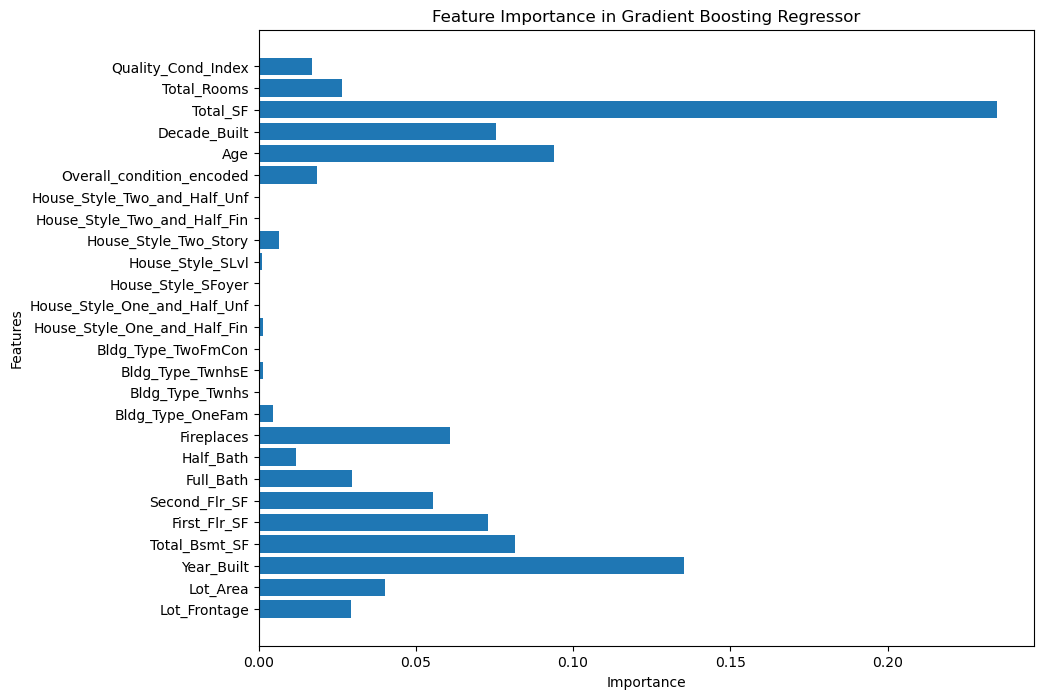

In [111]:
# Feature Importance
importances = best_model_gbm.feature_importances_
features = X.columns

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### INSIGHT: 

The feature most important to the gradient boosting model is the Total square feet which is the total square feet of the entire house at all levels.

#### Visualize the Predictions in GBM
Plot the actual vs. predicted values to visualize how well the model is performing.

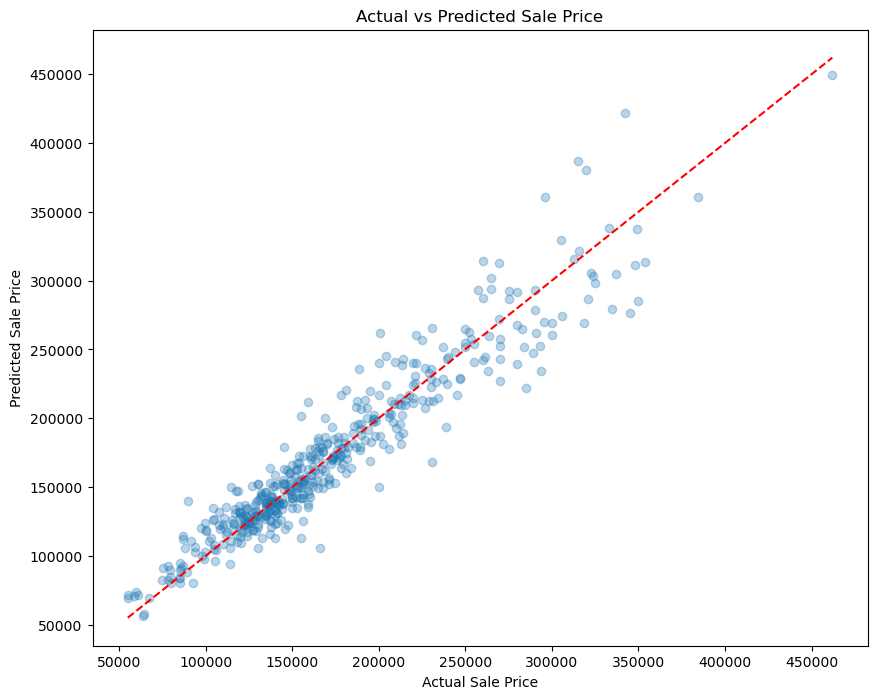

In [112]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_gbm, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

The plot comparing predicted versus actual sale prices shows how well the model's predictions align with the actual data. Points close to the red diagonal line indicate accurate predictions, while deviations from the line highlight areas where the model's predictions are less accurate, revealing potential biases or areas for model improvement.

### Random Forest model result visualization

__Visualize Feature Importance__

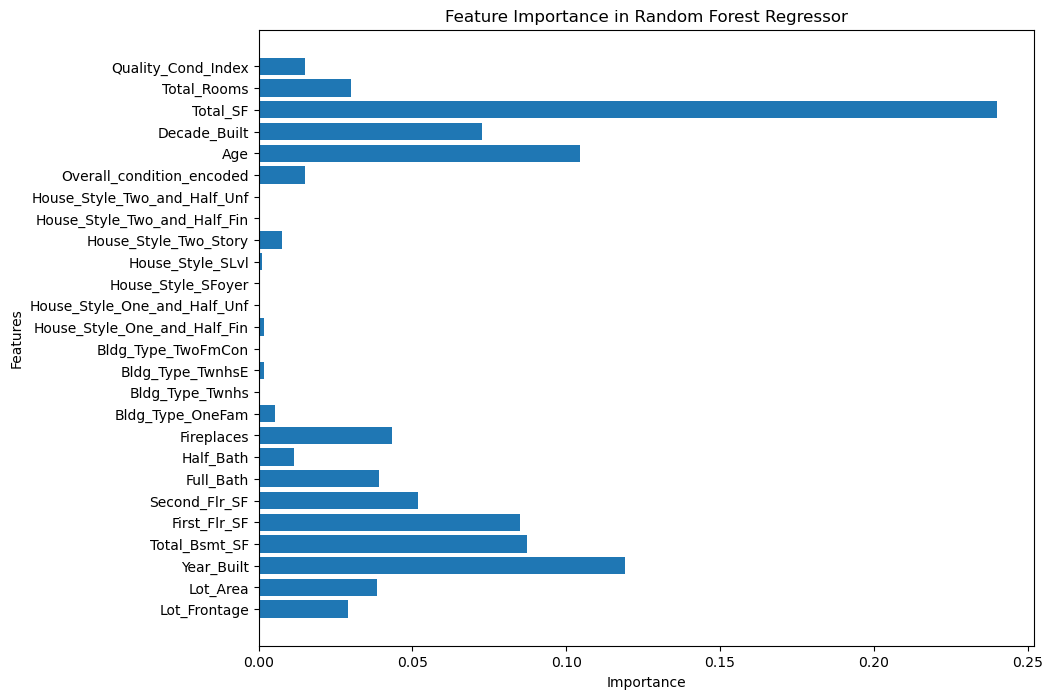

In [113]:
# Feature Importance
importances = best_model_rf.feature_importances_
features = X.columns

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### INSIGHT: 

The feature most important to the Random forest model is the Total square feet which is the total square feet of the entire house at all levels.

__Visualize the Predictions__

Plot the actual vs. predicted values to visualize how well the model is performing.

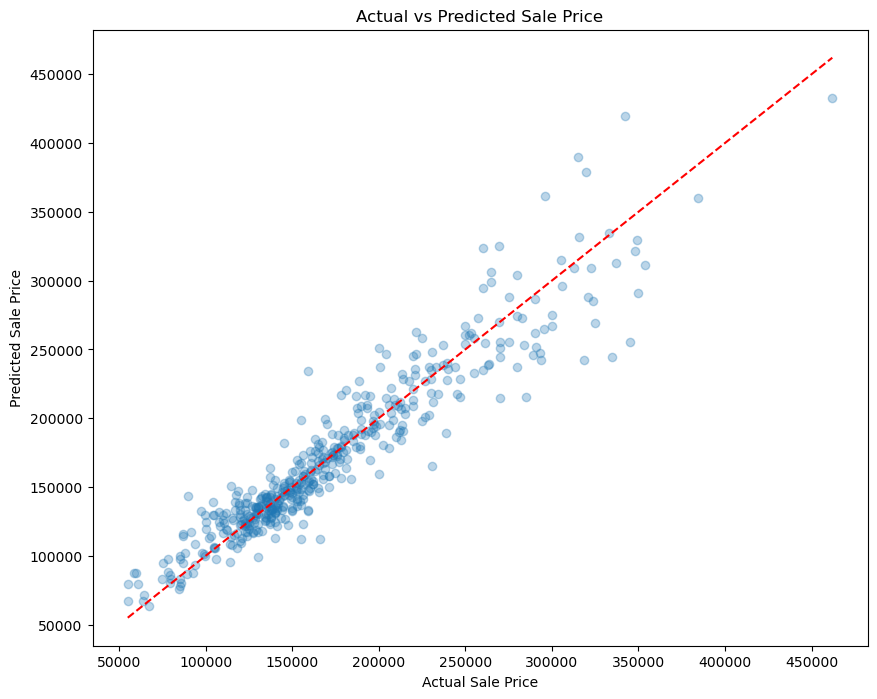

In [114]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

The plot comparing predicted versus actual sale prices shows how well the model's predictions align with the actual data. Points close to the red diagonal line indicate accurate predictions, while deviations from the line highlight areas where the model's predictions are less accurate, revealing potential biases or areas for model improvement.

## A BRIEF SUMMARY OF THE STEPS AND METHODOLOGIES USED IN THIS PROJECT.

As stated in the begining, this project was handled in 5 phases with each phase having its procedures all geared towards achieving the best results possible.

The steps and methodologies are as follows:

### Phase 1: Data Collection and Preparation
The first step taken was to load the data and do a general overview of the data and here is a summary of the dataset itself

- Number of rows: 2413
- Number of columns: 18
- Target variable: SalePrice

To continue Data cleaning was done under the following guide:
- Identify and handle missing data.

- Identify and remove duplicate records.

- Correct typographical errors and inconsistencies

- Ensure consistent formats (dates, time, units, labels)

- Convert data types to appropriate formats

- Handling Categorical Variables: Clean text (remove special characters, punctuation, stop words)

The result of the data cleaning was good as it had non of the above.

### Phase 2: Exploratory Data Analysis (EDA)

- Univariate analysis was conducted to visualize and understand the distribution of each feature including the target feature.
- Multivariate analysis was done to understand the relationship of the features and he target variable
- Correlation Analysis: A correlation matrix was used to identify the strongest predictors of SalePrice. Features like TotalBsmtSF, first floor square feet, year built, full bathrooms showed strong to good positive correlations with the target variable.

__Outliers__
Outliers were identified using boxplots and from the box plot I saw that only the half bathroom feature is free of outliers while few other like full bath, Kitchen and bedroom above ground, fireplaces has very few outliers. The outliers were calculated using the IQR method and when all were brought together they were dropped as they did not account for up to 5 percent of the dataset.

### Phase 3: Feature Engineering
__Handling Categorical Variables:__
Categorical features like BldgType, overall condition, exterior condition, house style were converted into numerical form using one-hot encoding for the non-ordinal eatures like building type and house style and the ordinal encoding for ordinal features, enabling the model to process them effectively.

__Creating New Features__

New features such as Age (calculated as present year(2024) - YearBuilt), TotalSF (sum of TotalBsmtSF, first loor sf, and second floor sf), Quality condition Index(overall condition multiplied by the exterior condition) were created to capture additional information.

__Feature Selection__
Features with low correlation to SalePrice and high multicollinearity were dropped to improve model efficiency and prevent overfitting. This was done specifically for the original numeric features.

### Phase 4: Model Training and Evaluation
__Model training__

The models were trained on the preprocessed dataset, with hyperparameter tuning performed using GridSearchCV to optimize performance. Multiple models were trained to give the option of selecting the best model. The models that were trained were:
- Linear Regression
- Lasso and Ridge regression
- Gradient Boosting Machines (GBM)
- Random Forest

__Model Evaluation__
The models were evaluated based on metrics such as Mean square error(MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

### Phase 5: Model Interpretation and Reporting

#### Best Model Performance

The Gradient Boosting Model (GBM) outperformed other models with the lowest RMSE and the highest R², making it the best model for predicting house prices in this dataset with the following metrics:
- RMSE: 19458.1
- R²: 0.905

#### Feature Importance
Feature importance analysis revealed that Total square feet, decade built, year built, age and TotalBsmtSF were the most critical predictors of SalePrice.

#### Conclusion
This analysis demonstrated that machine learning models, particularly GBM, could effectively predict house prices using a well-engineered set of features. The EDA and feature engineering steps were crucial in improving model performance.

#### Future Work
Further improvements could be made by exploring more advanced modeling techniques, gathering additional data, or experimenting with different feature engineering strategies and very importantly digging into the longitude and latitude as location can have a good effect on the price of a house.

__It will be good to note that I did a little experiment by normalising the count data and suprisingly the model performance increased even though the difference was not significant about 0.03__